# Exploratory Data Analysis 

In [22]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#conda install -c plotly plotly=4.5.4
import plotly.graph_objects as go #Violin plot
sb.set() # set the default Seaborn style for graphics

from sklearn import preprocessing

__Import the cleaned dataset__

In [2]:
listings = pd.read_csv('..\dataset_filter\listings_2.csv')
listings['host_response_rate'] = listings['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

In [3]:
le = preprocessing.LabelEncoder()
listings['zipcode'] = le.fit_transform(listings['zipcode'])
listings['zipcode']

0       14
1       14
2       14
3       14
4       14
        ..
3813     6
3814     1
3815    25
3816     9
3817     8
Name: zipcode, Length: 3818, dtype: int32

In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 60 columns):
id                                  3818 non-null int64
name                                3818 non-null object
summary                             3818 non-null object
space                               3818 non-null object
description                         3818 non-null object
neighborhood_overview               3818 non-null object
transit                             3818 non-null object
host_id                             3818 non-null int64
host_since                          3818 non-null object
host_response_time                  3818 non-null object
host_response_rate                  3818 non-null float64
host_acceptance_rate                3818 non-null float64
host_is_superhost                   3818 non-null object
host_neighbourhood                  3818 non-null object
host_listings_count                 3818 non-null float64
host_total_listings_count           3

__Sort the dataset into numerical and categorical data__

In [5]:
numerical_data = listings.select_dtypes(include=[np.number])
categorical_data = listings.select_dtypes(exclude=[np.number])

__Int and Float types__

In [6]:
numerical_data.describe()

id       host_id  host_response_rate  host_acceptance_rate  \
count  3.818000e+03  3.818000e+03         3818.000000           3818.000000   
mean   5.550111e+06  1.578556e+07           94.885542             99.973808   
std    2.962660e+06  1.458382e+07           11.990401              1.618386   
min    3.335000e+03  4.193000e+03           17.000000              0.000000   
25%    3.258256e+06  3.275204e+06           98.000000            100.000000   
50%    6.118244e+06  1.055814e+07          100.000000            100.000000   
75%    8.035127e+06  2.590309e+07          100.000000            100.000000   
max    1.034016e+07  5.320861e+07          100.000000            100.000000   

       host_listings_count  host_total_listings_count      zipcode  \
count          3818.000000                3818.000000  3818.000000   
mean              7.157412                   7.157412     9.703510   
std              28.620929                  28.620929     6.959827   
min               1.000000                   1.000000     0.000000   
25%               1.000000                   1.000000     3.000000   
50%               1.000000                   1.000000     9.000000   
75%               3.000000                   3.000000    15.000000   
max             502.000000                 502.000000    27.000000   

       accommodates    bathrooms     bedrooms  ...  number_of_reviews  \
count   3818.000000  3818.000000  3818.000000  ...        3818.000000   
mean       3.349398     1.258643     1.308015  ...          22.223415   
std        1.977599     0.589365     0.883252  ...          37.730892   
min        1.000000     0.000000     0.000000  ...           0.000000   
25%        2.000000     1.000000     1.000000  ...           2.000000   
50%        3.000000     1.000000     1.000000  ...           9.000000   
75%        4.000000     1.000000     2.000000  ...          26.000000   
max       16.000000     8.000000     7.000000  ...         474.000000   

       review_scores_rating  review_scores_accuracy  \
count           3818.000000             3818.000000   
mean              94.584075                9.636721   
std                6.508363                0.700898   
min               20.000000                2.000000   
25%               93.000000                9.000000   
50%               96.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                3818.000000            3818.000000   
mean                    9.566003               9.790990   
std                     0.781946               0.582518   
min                     3.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  3818.000000             3818.000000   
mean                      9.815610                9.614196   
std                       0.548938                0.624517   
min                       2.000000                4.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  calculated_host_listings_count  reviews_per_month  
count          3818.000000                     3818.000000        3818.000000  
mean              9.457569                        2.946307           2.065888  
std               0.741315                        5.893029           1.814807  
min               2.000000                        1.000000           0.020000  
25%               9.000000   

__Removing numerical variables that are not important for EDA__

In [7]:
numerical_data = numerical_data.drop(columns=['id','host_id','host_listings_count','number_of_reviews',])

__Strings/Object types__

In [8]:
categorical_data.describe()

name  \
count                     3818   
unique                    3792   
top     Capitol Hill Apartment   
freq                         3   

                                                  summary  \
count                                                3818   
unique                                               3477   
top     This is a modern fully-furnished studio apartm...   
freq                                                   18   

                                                    space  \
count                                                3818   
unique                                               3119   
top     *Note: This fall, there will be major renovati...   
freq                                                   15   

                                              description  \
count                                                3818   
unique                                               3742   
top     Our space is a mix of a hostel and a home. We ...   
freq                                                   10   

                                    neighborhood_overview  \
count                                                3818   
unique                                               2506   
top     Close to downtown, Capitol Hill is one of Seat...   
freq                                                   21   

                                                  transit host_since  \
count                                                3818       3818   
unique                                               2574       1380   
top     Convenient public transportation. The location...  30/8/2013   
freq                                                   50         51   

       host_response_time host_is_superhost host_neighbourhood  ...  bed_type  \
count                3818              3818               3818  ...      3818   
unique                  4                 2                102  ...         5   
top        within an hour                 f       Capitol Hill  ...  Real Bed   
freq                 1961              3040                440  ...      3657   

       amenities calendar_updated has_availability first_review last_review  \
count       3818             3818             3818         3818        3818   
unique      3284               34                1          984         321   
top           {}            today                t    21/9/2015   1/12/2015   
freq          45              706             3818           31         113   

       instant_bookable cancellation_policy require_guest_profile_picture  \
count              3818                3818                          3818   
unique                2                   3                             2   
top                   f              strict                             f   
freq               3227                1417                          3497   

       require_guest_phone_verification  
count                              3818  
unique                                2  
top                                   f  
freq                               3443  

[4 rows x 29 columns]

In [9]:
categorical_data.shape

(3818, 29)

# Violin Plot for Price

In [10]:
violinPrice = go.Figure(data=go.Violin(x=listings['price'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.8,
                               y0='Price'))

violinPrice.update_layout(yaxis_zeroline=False)
violinPrice.show()

In [11]:
pd.cut(numerical_data['price'], bins=np.linspace(0, 1000, 11)).value_counts()

(0.0, 100.0]       1960
(100.0, 200.0]     1401
(200.0, 300.0]      298
(300.0, 400.0]       96
(400.0, 500.0]       36
(500.0, 600.0]       13
(600.0, 700.0]        5
(900.0, 1000.0]       4
(700.0, 800.0]        4
(800.0, 900.0]        1
Name: price, dtype: int64

# Numerical Variables

# Box-Plot comparing Numeric Variables with Price 

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

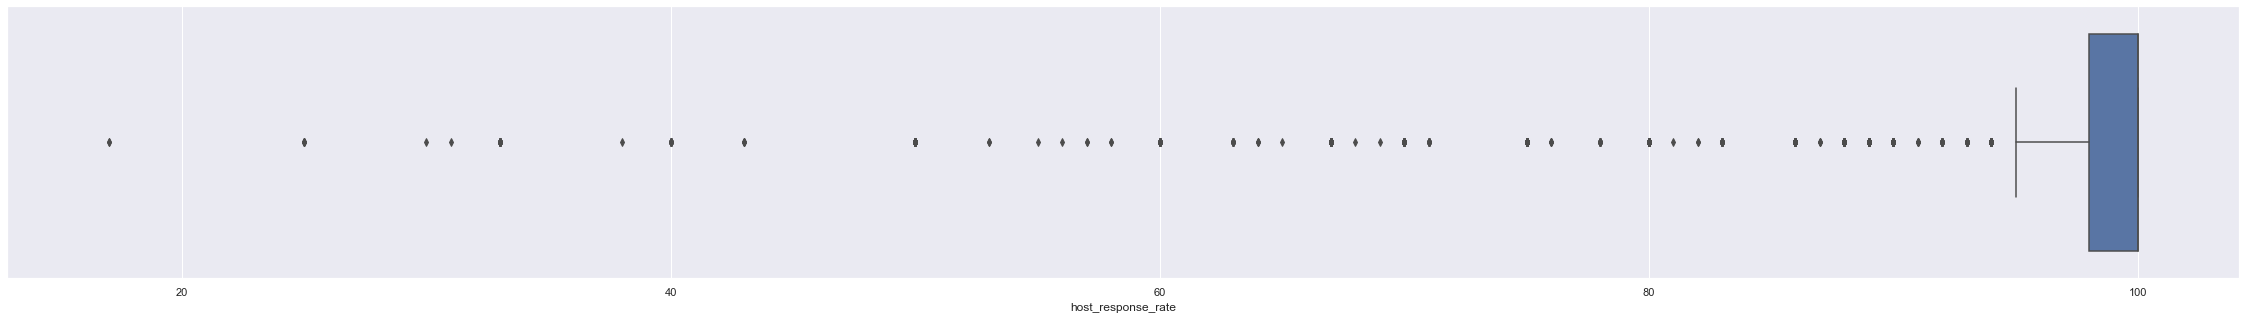

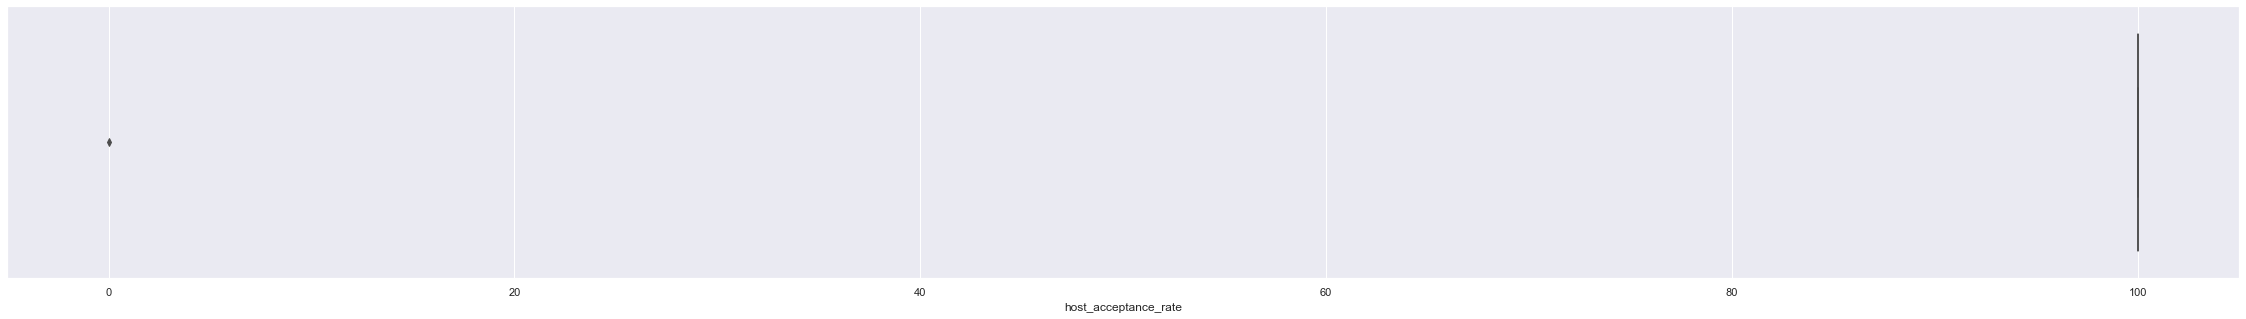

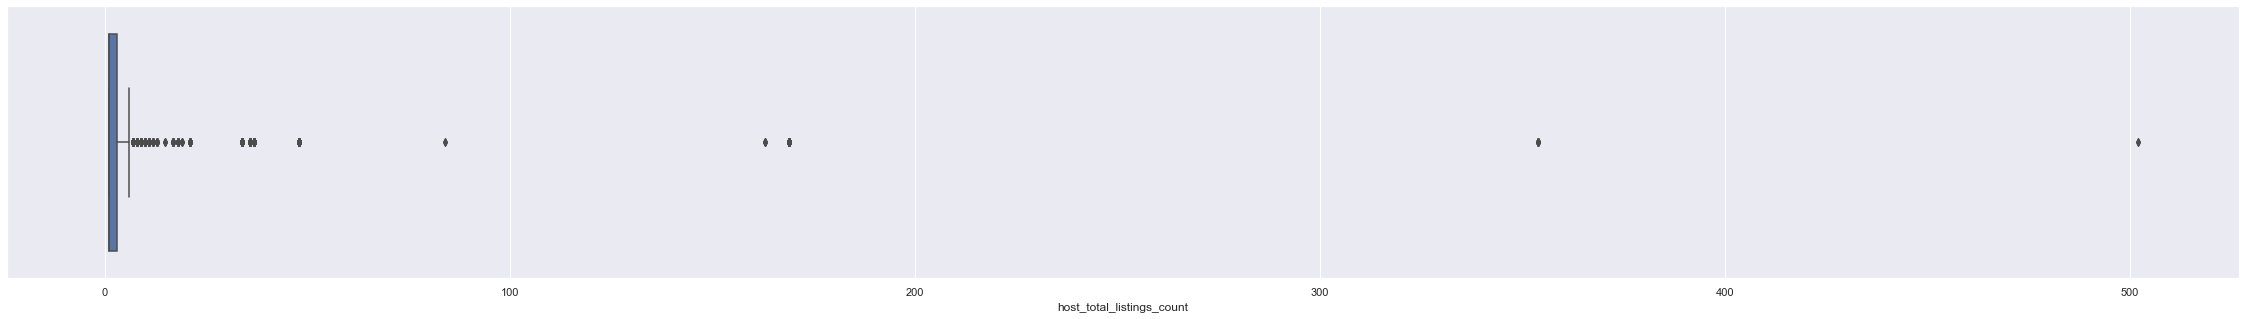

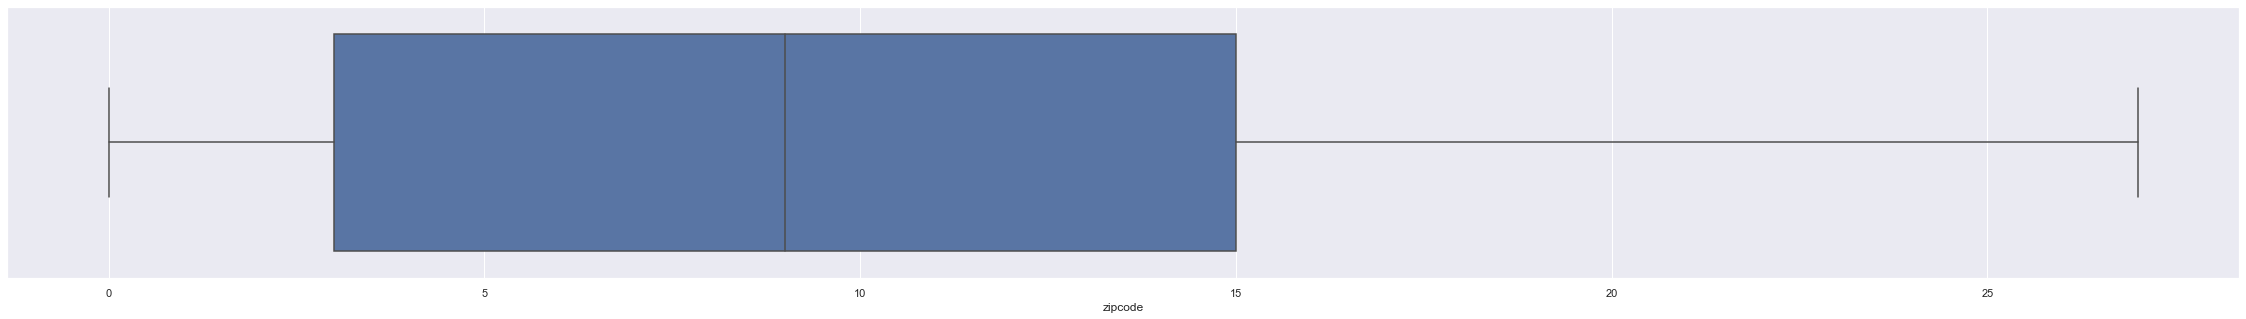

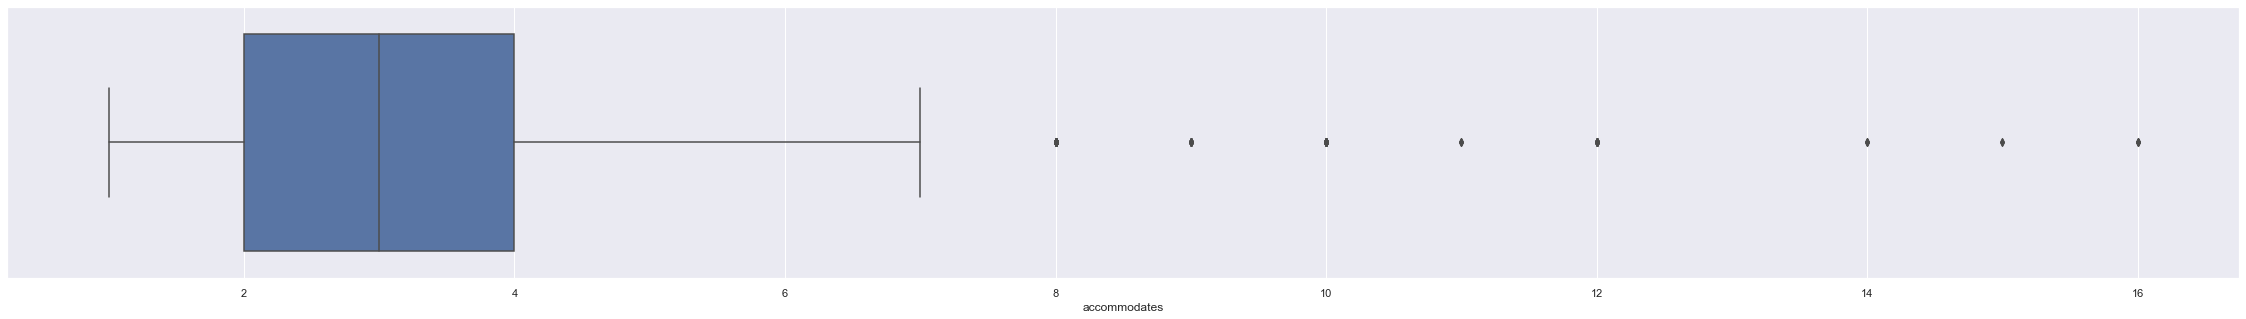

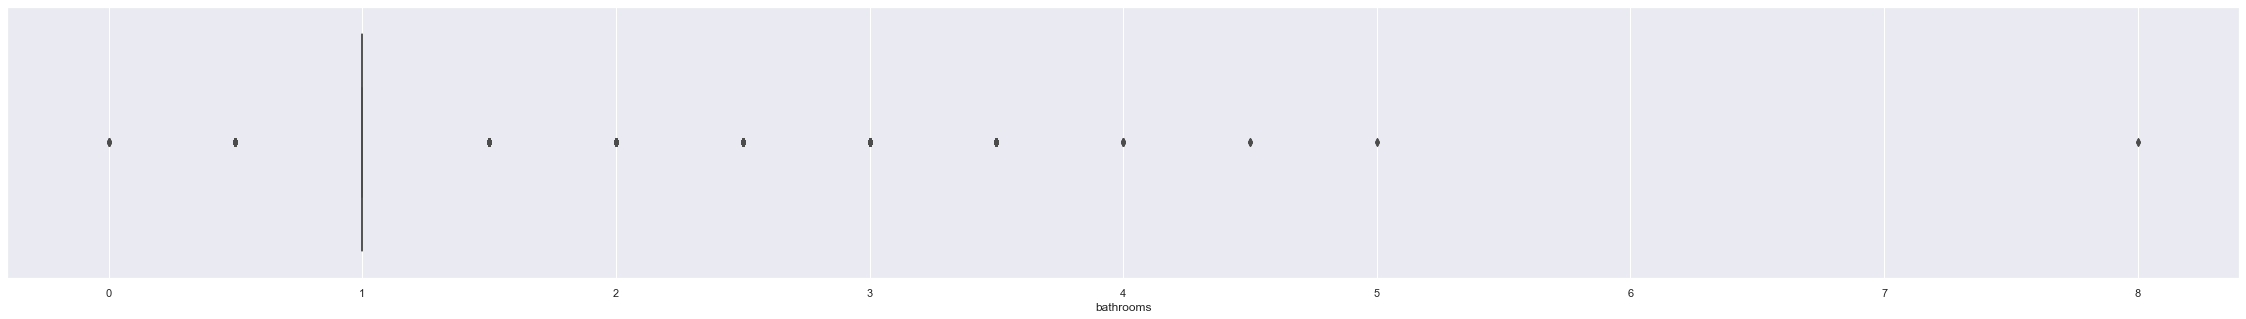

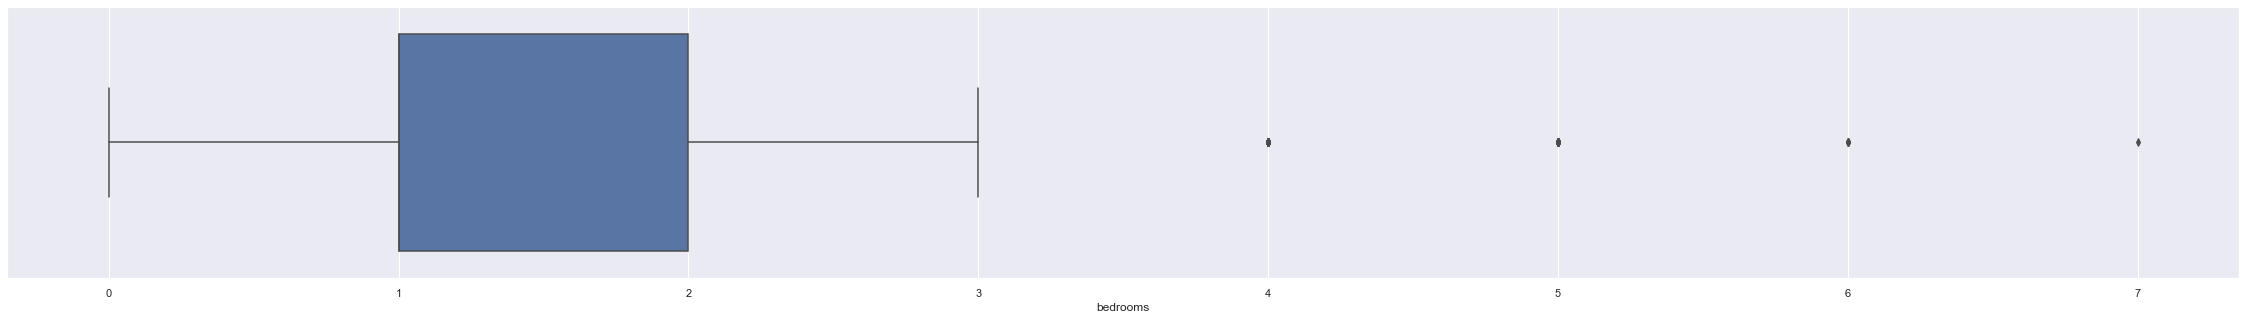

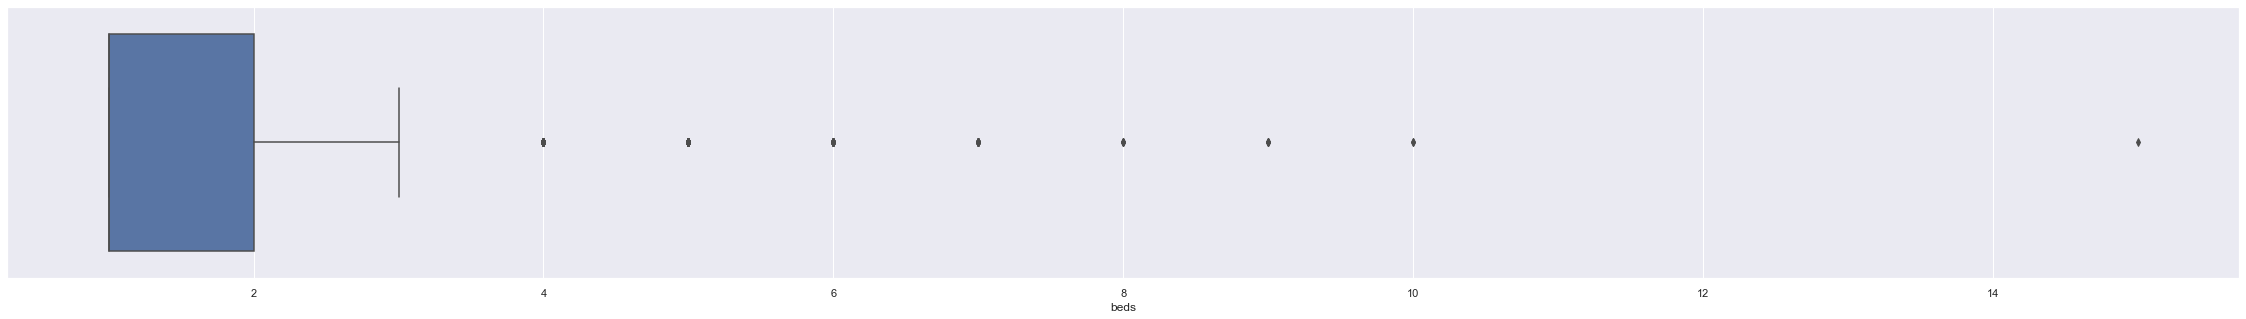

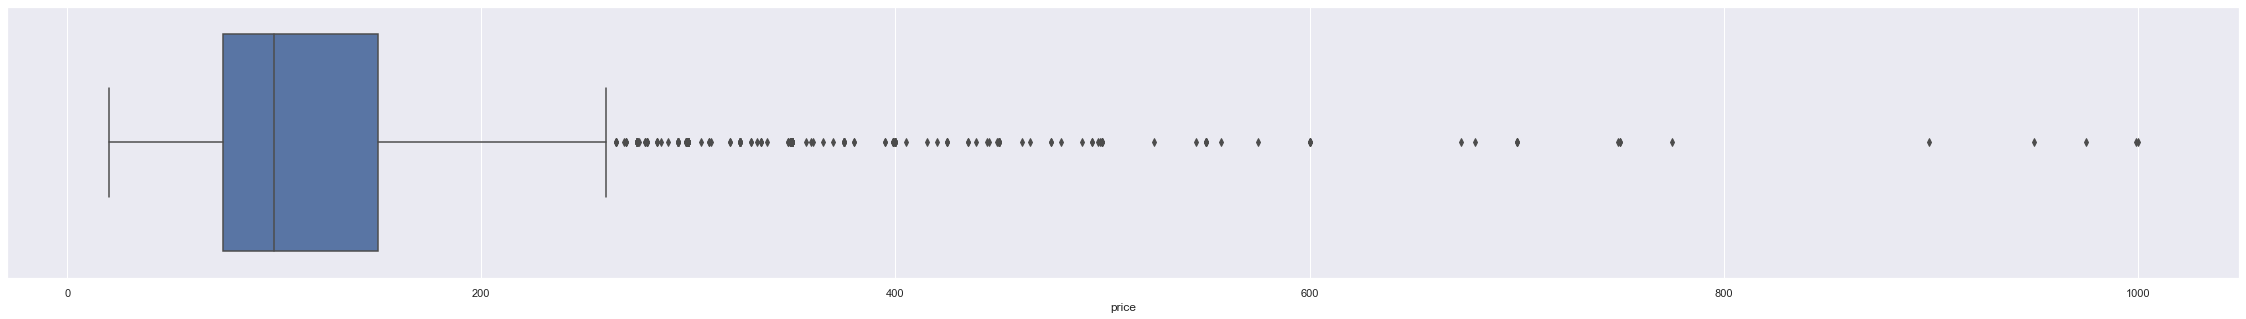

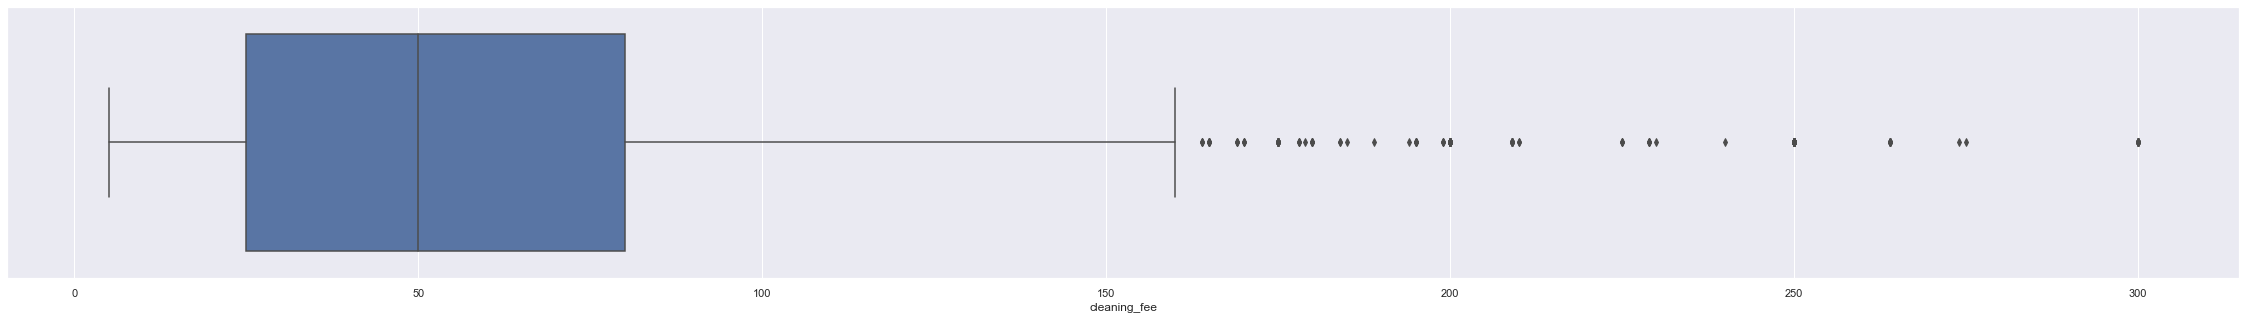

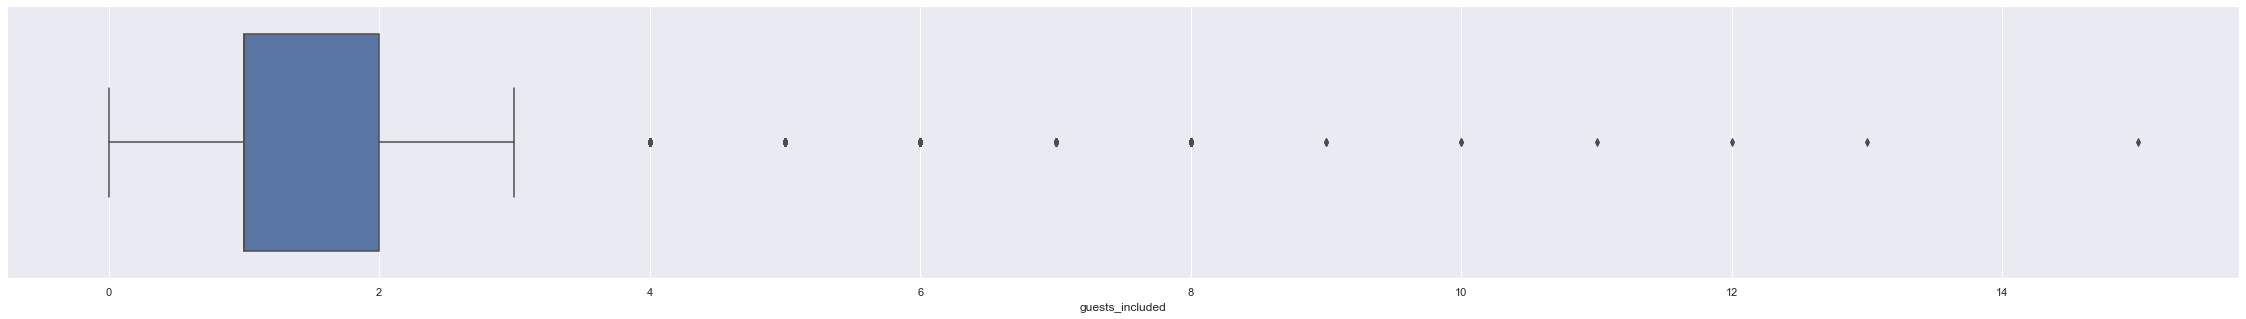

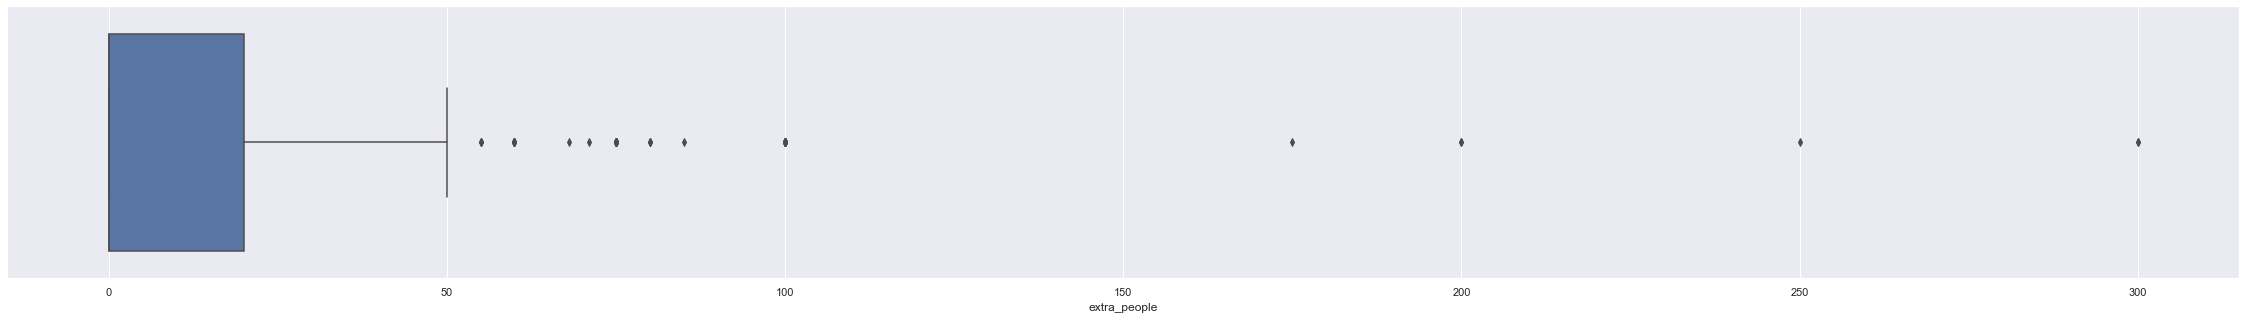

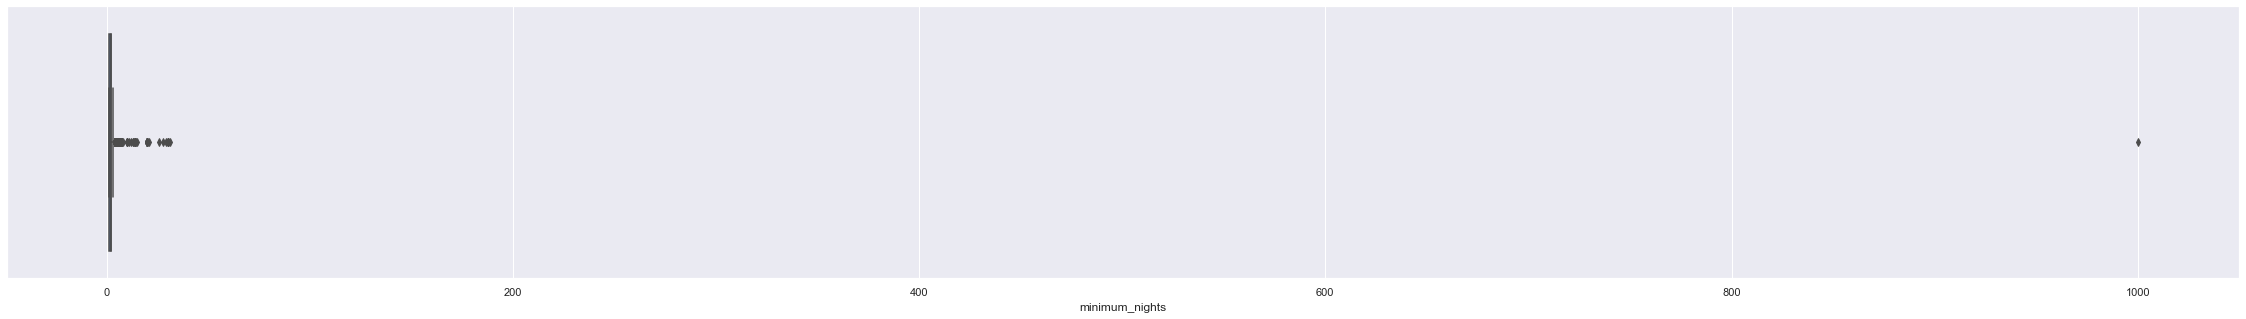

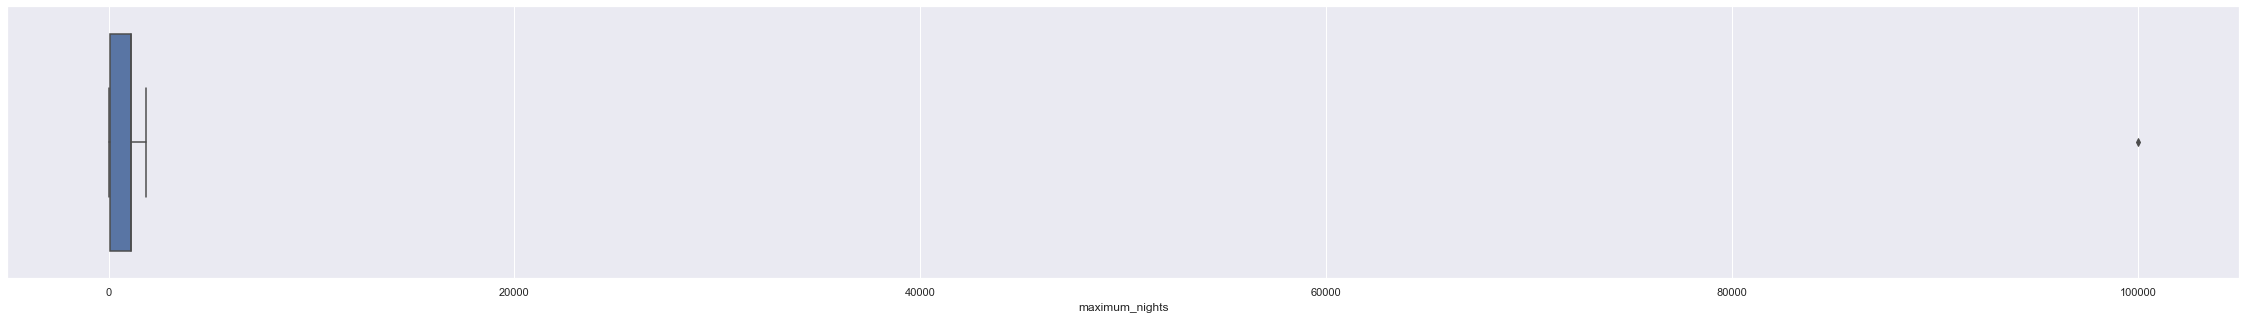

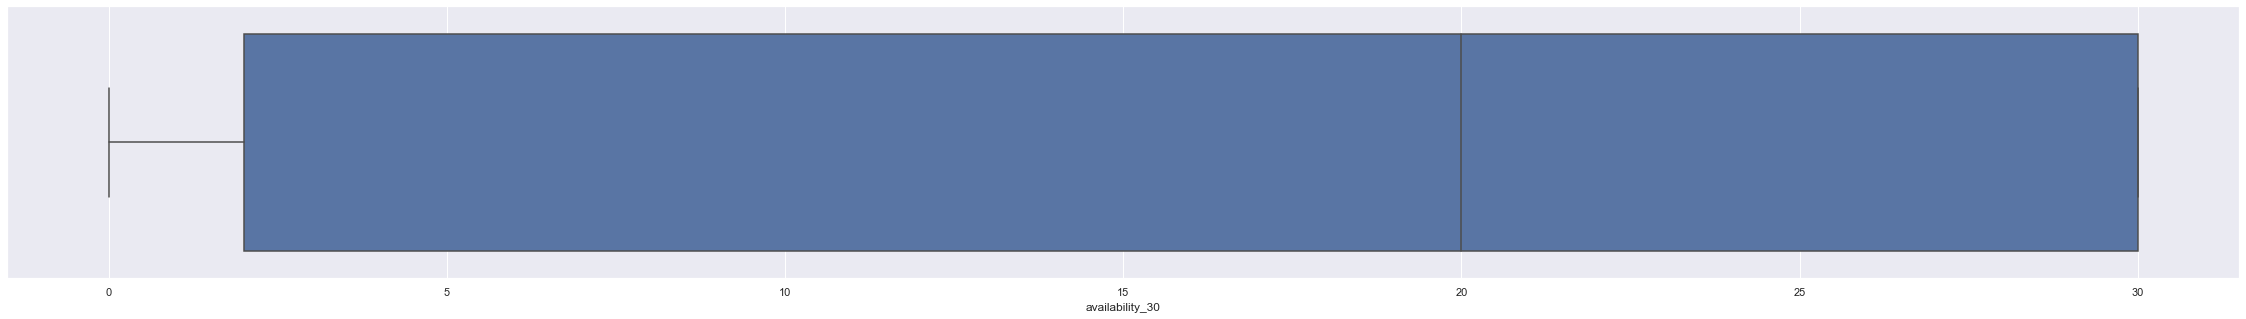

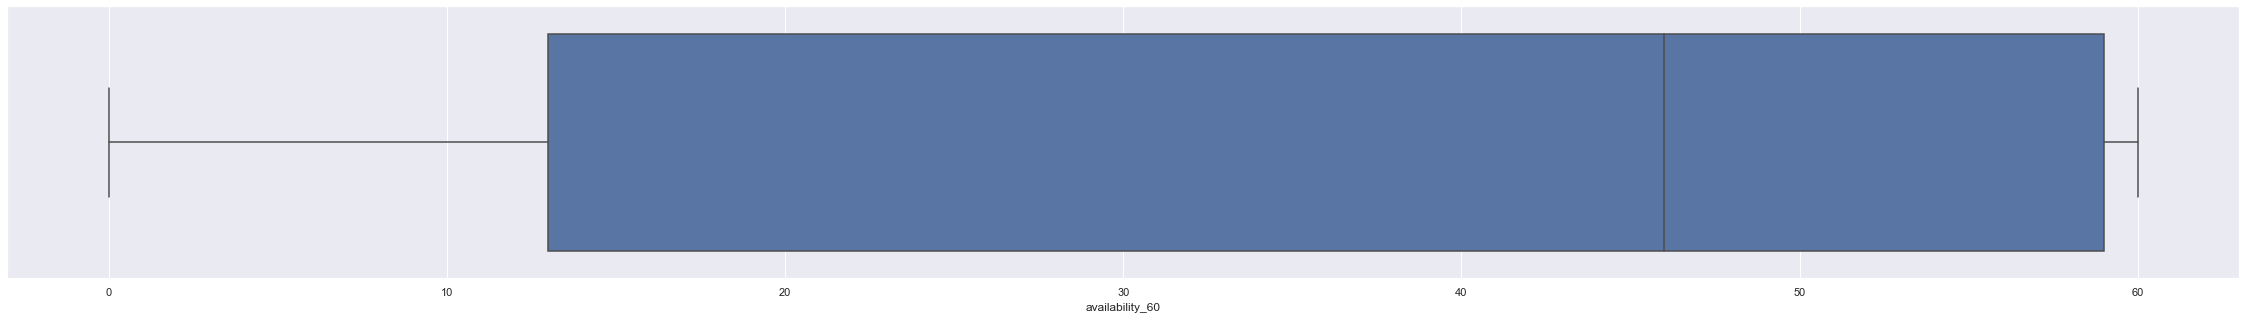

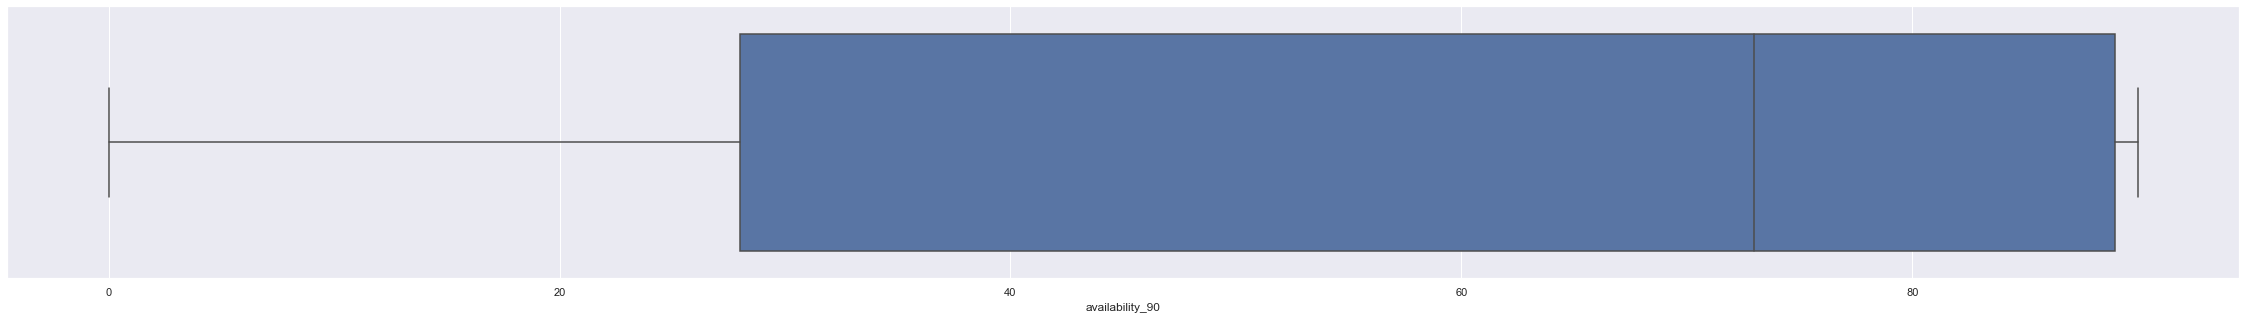

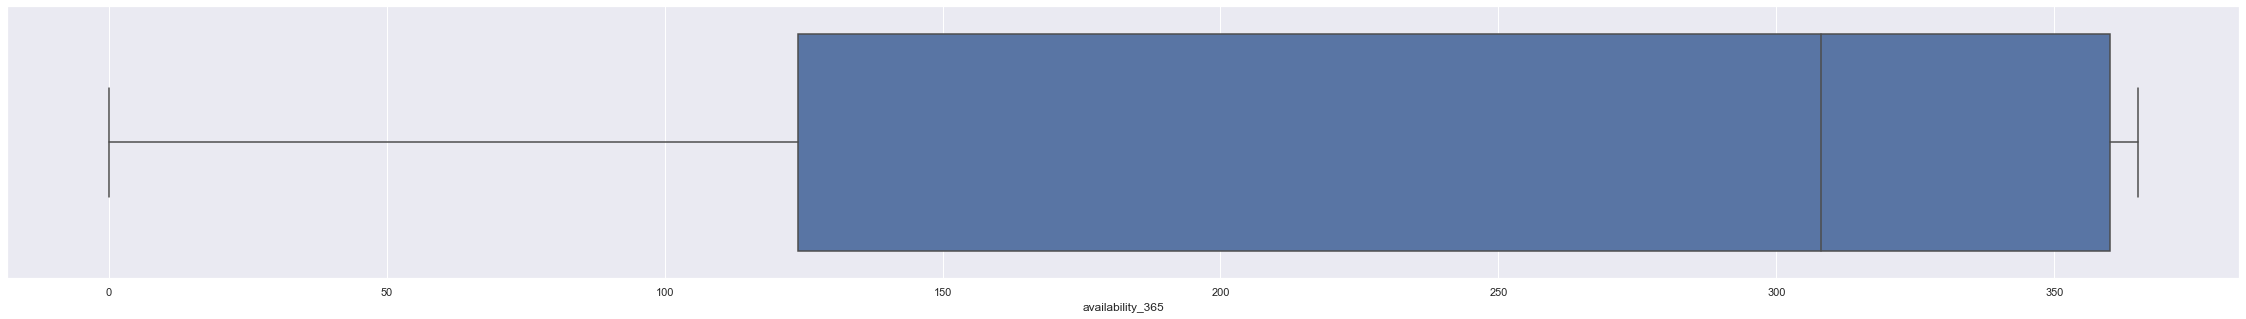

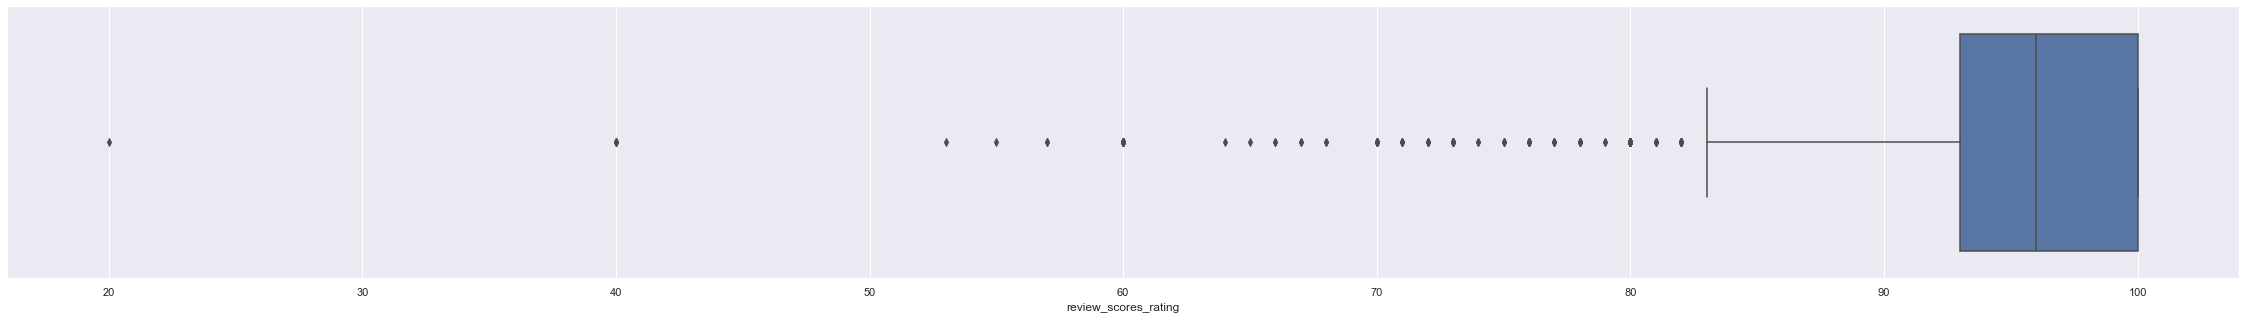

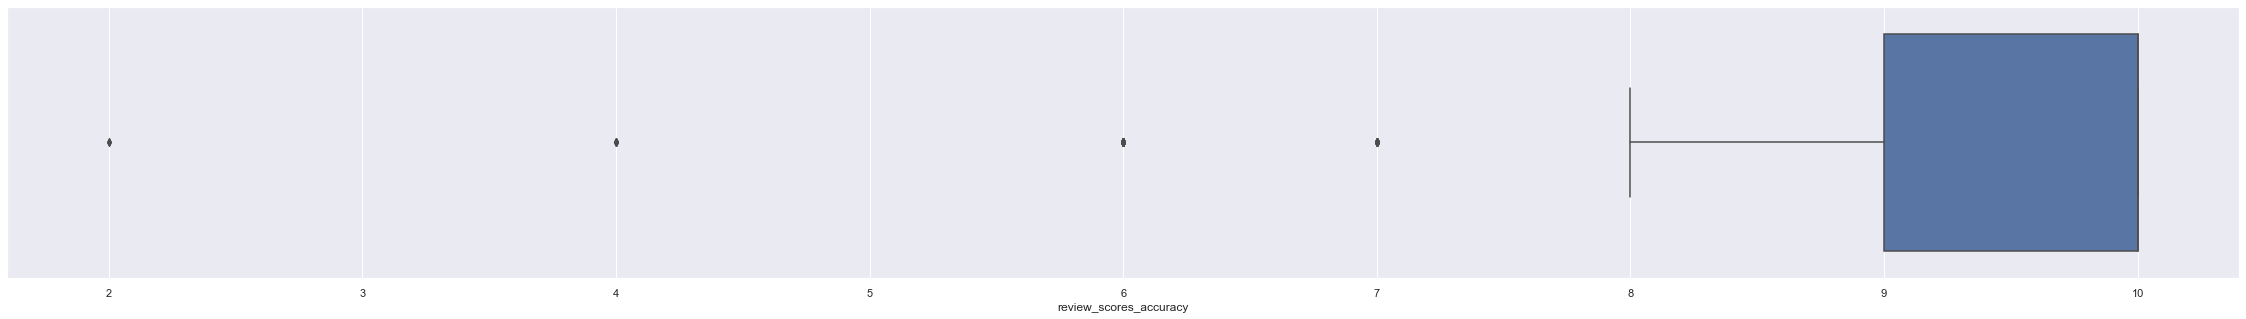

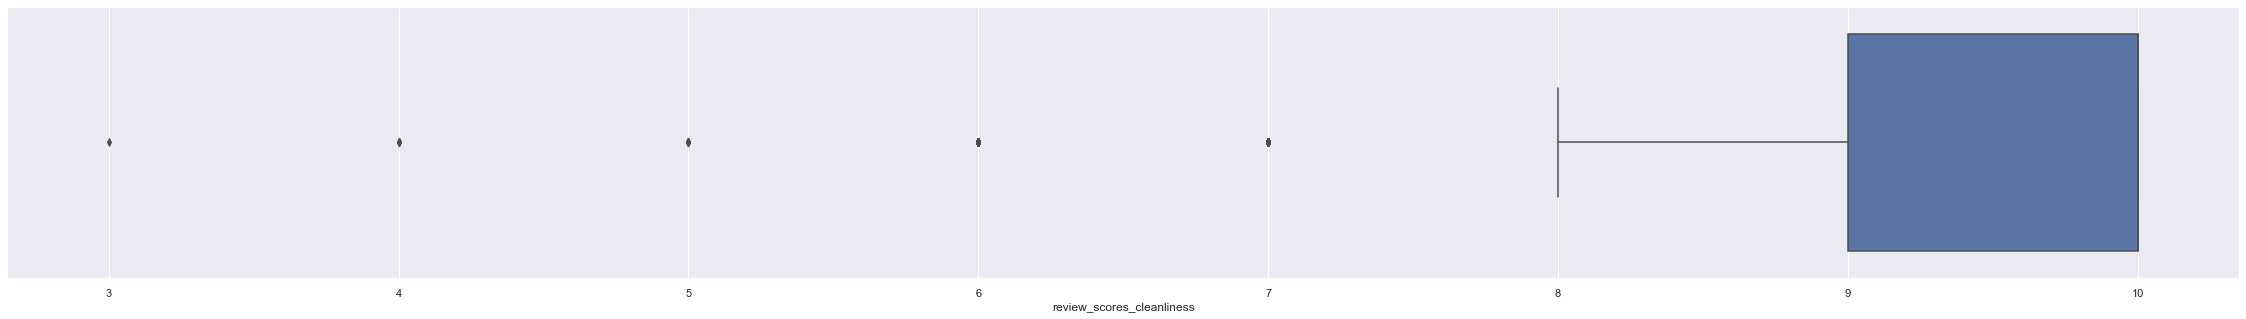

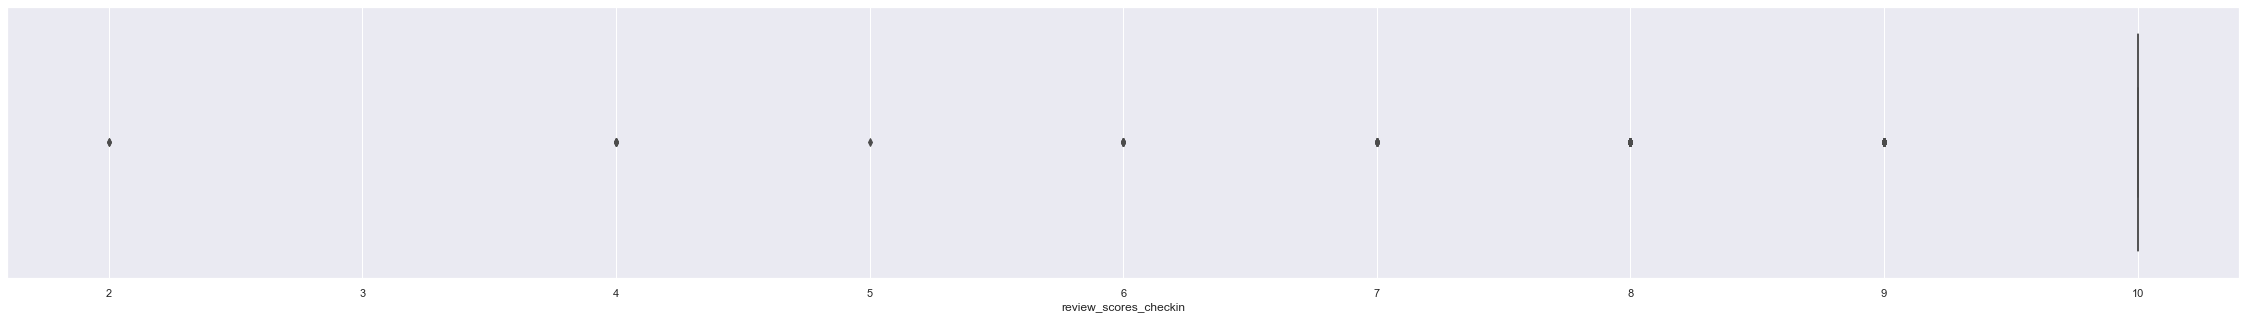

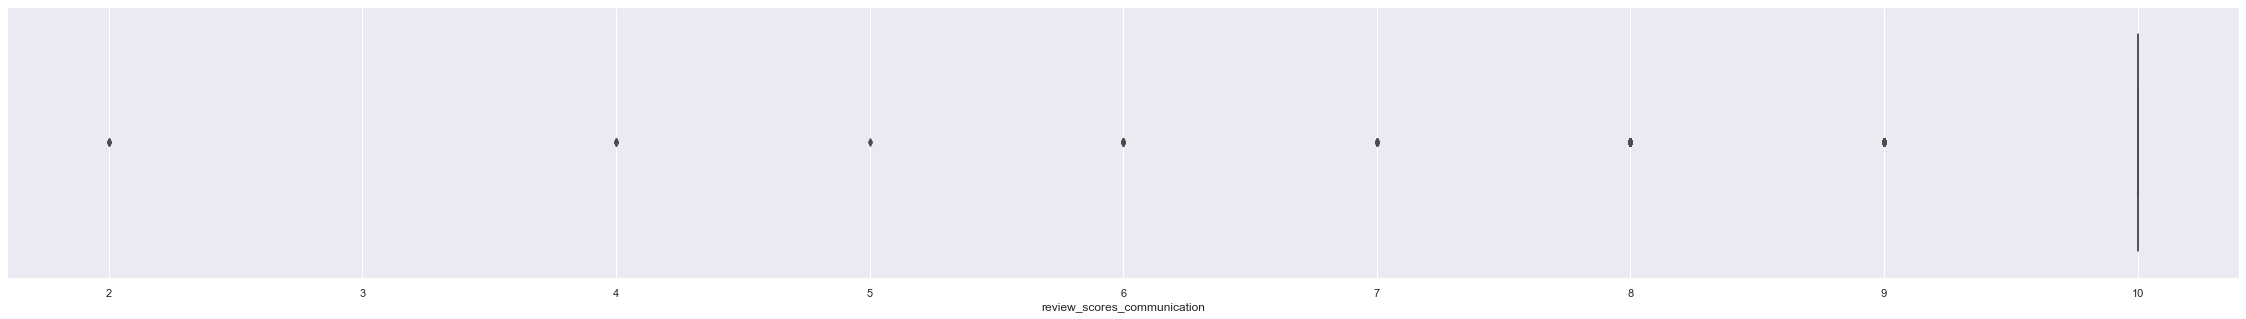

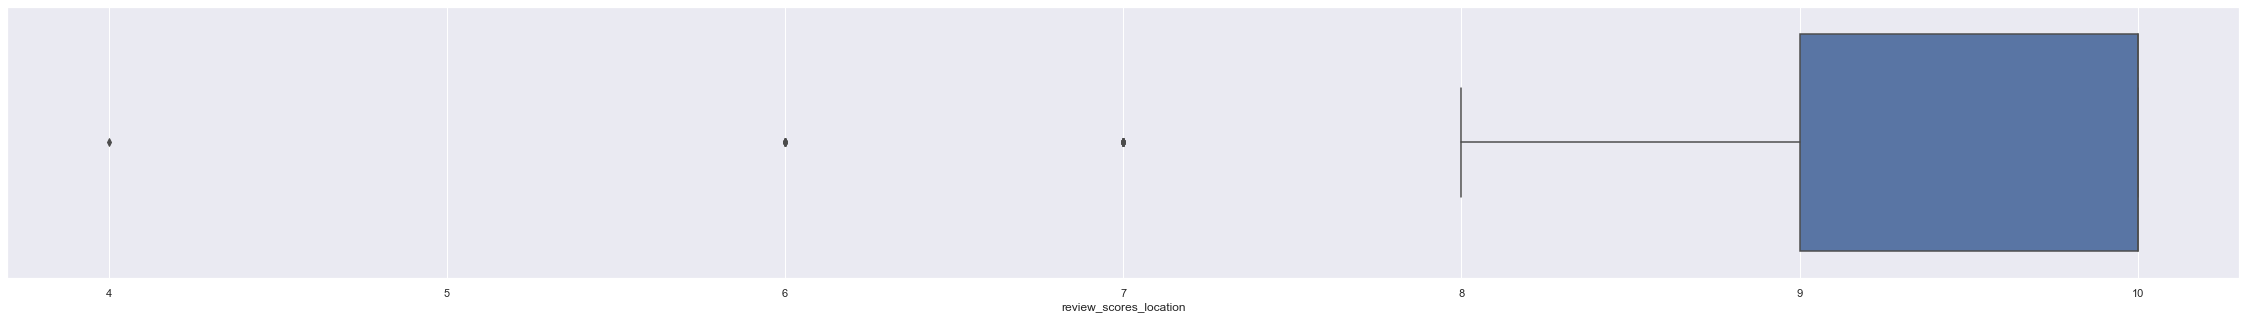

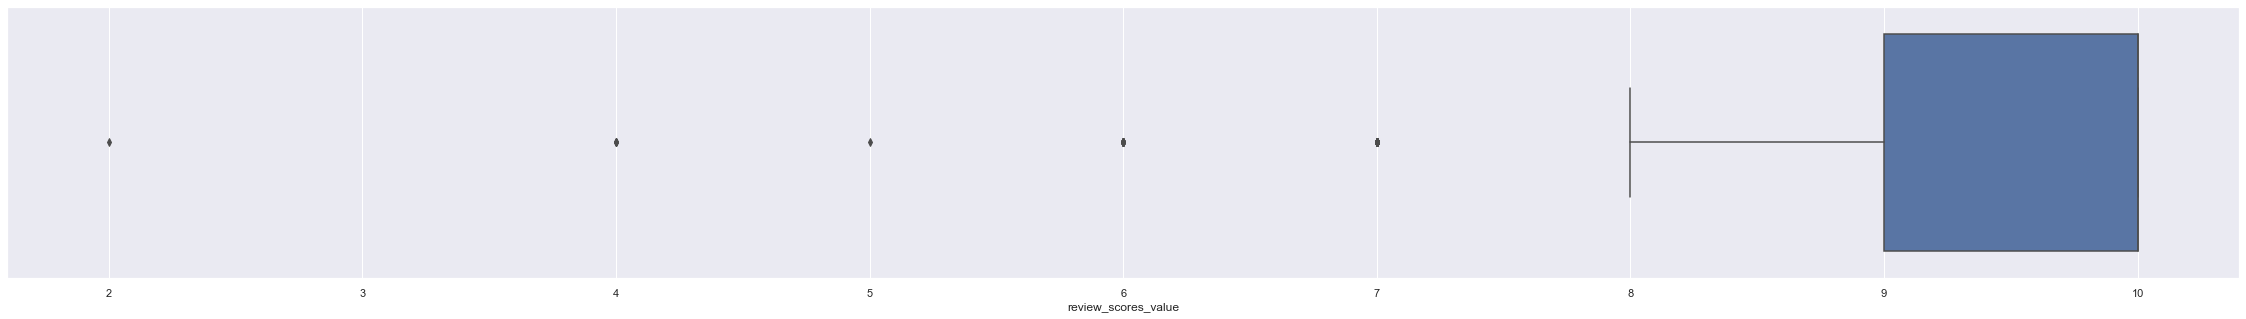

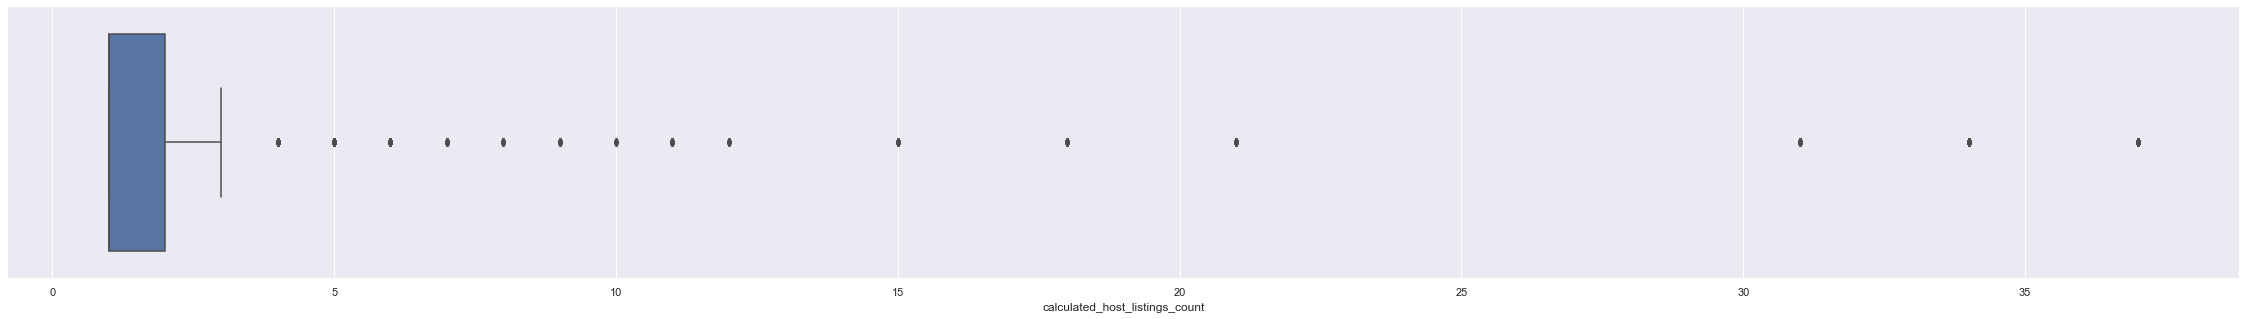

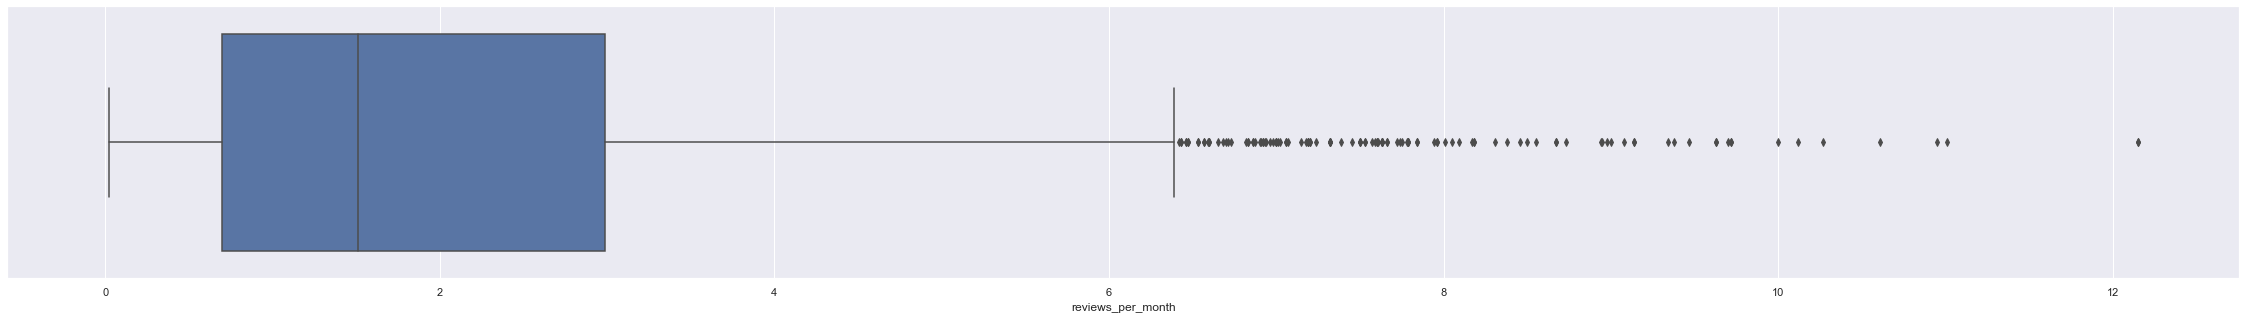

In [12]:
for var in numerical_data:
    f, axes = plt.subplots(1, 1, figsize=(40, 5))
    sb.boxplot(numerical_data[var], orient = "h")

# Correlation between Numerical Variables and Price

In [13]:
corr_df = numerical_data.corr()

# Correlation Matrix for the first 11 rows
pd.DataFrame(corr_df.loc[:, :"availability_60"])

host_response_rate  host_acceptance_rate  \
host_response_rate                        1.000000             -0.006905   
host_acceptance_rate                     -0.006905              1.000000   
host_total_listings_count                 0.020278              0.003483   
zipcode                                   0.000767              0.020244   
accommodates                             -0.000291              0.011046   
bathrooms                                 0.006433              0.007104   
bedrooms                                 -0.001915              0.005645   
beds                                      0.006587              0.010452   
price                                    -0.013018              0.005915   
cleaning_fee                             -0.018646              0.013538   
guests_included                           0.057963              0.008305   
extra_people                              0.020869              0.009820   
minimum_nights                            0.005062             -0.000626   
maximum_nights                           -0.016279             -0.003313   
availability_30                          -0.034189             -0.017571   
availability_60                          -0.025470             -0.016082   
availability_90                          -0.019418             -0.015168   
availability_365                         -0.065161             -0.015352   
review_scores_rating                      0.108189             -0.013471   
review_scores_accuracy                    0.095961              0.014706   
review_scores_cleanliness                 0.127316             -0.008985   
review_scores_checkin                     0.110526             -0.005808   
review_scores_communication               0.102829             -0.005438   
review_scores_location                    0.050010             -0.010000   
review_scores_value                       0.107432              0.009992   
calculated_host_listings_count           -0.080233              0.005346   
reviews_per_month                         0.142550              0.013879   

                                host_total_listings_count   zipcode  \
host_response_rate                               0.020278  0.000767   
host_acceptance_rate                             0.003483  0.020244   
host_total_listings_count                        1.000000 -0.108468   
zipcode                                         -0.108468  1.000000   
accommodates                                     0.111204  0.039050   
bathrooms                                        0.068199  0.048527   
bedrooms                                         0.067310  0.057819   
beds                                             0.085421  0.030551   
price                                            0.094016 -0.019772   
cleaning_fee                                     0.160151 -0.000405   
guests_included                                 -0.059279  0.022550   
extra_people                                    -0.063550  0.047257   
minimum_nights                                   0.001891  0.008218   
maximum_nights                                   0.022718  0.001809   
availability_30                                  0.119640  0.025470   
availability_60                                  0.124571  0.023592   
availability_90                                  0.123872  0.024876   
availability_365                                 0.085963  0.019534   
review_scores_rating                            -0.084700  0.063772   
review_scores_accuracy                          -0.081202  0.029526   
review_scores_cleanliness                       -0.033025  0.043216   
review_scores_checkin                           -0.143301  0.027167   
review_scores_communication                     -0.104456  0.031494   
review_scores_location                           0.013834 -0.151394   
review_scores_value                             -0.101931  0.059409   
calculated_host_listings_count                   0.224218

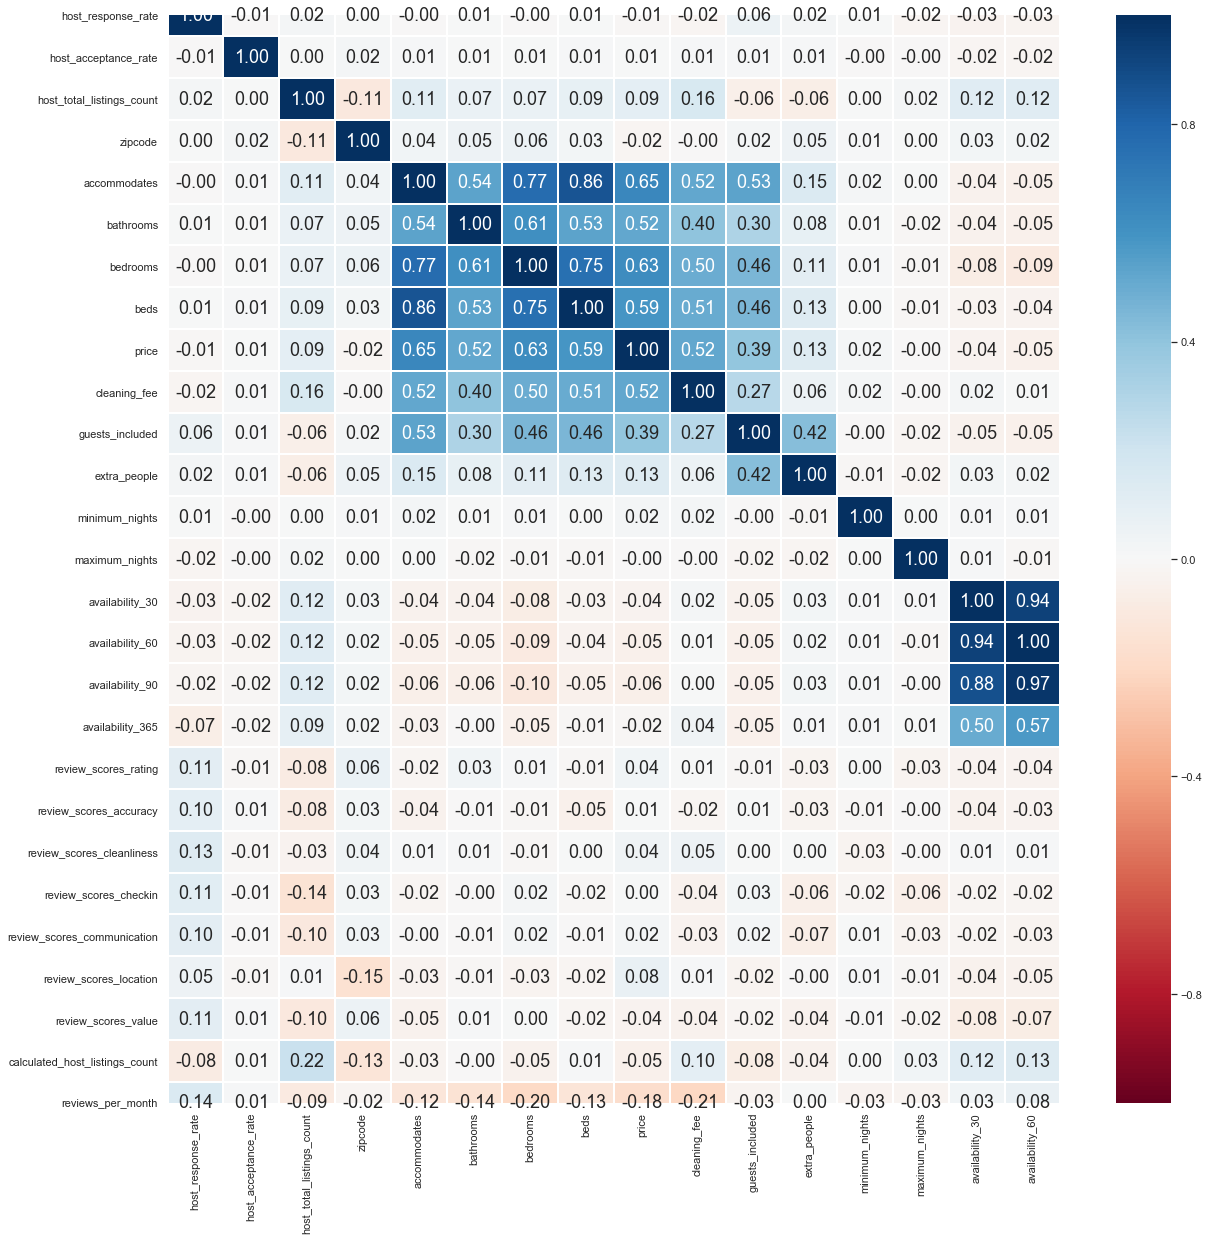

In [14]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(corr_df.loc[:, :"availability_60"], vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [15]:
pd.DataFrame(corr_df.loc[:,"availability_90":])

availability_90  availability_365  \
host_response_rate                    -0.019418         -0.065161   
host_acceptance_rate                  -0.015168         -0.015352   
host_total_listings_count              0.123872          0.085963   
zipcode                                0.024876          0.019534   
accommodates                          -0.060468         -0.031535   
bathrooms                             -0.058058         -0.002989   
bedrooms                              -0.102933         -0.049553   
beds                                  -0.047285         -0.009495   
price                                 -0.058810         -0.015550   
cleaning_fee                           0.001851          0.040246   
guests_included                       -0.047100         -0.048922   
extra_people                           0.026427          0.012101   
minimum_nights                         0.009076          0.009087   
maximum_nights                        -0.002945          0.007265   
availability_30                        0.875778          0.503881   
availability_60                        0.973353          0.572857   
availability_90                        1.000000          0.619355   
availability_365                       0.619355          1.000000   
review_scores_rating                  -0.029452         -0.030959   
review_scores_accuracy                -0.021963         -0.035890   
review_scores_cleanliness              0.013807         -0.015870   
review_scores_checkin                 -0.010076         -0.000640   
review_scores_communication           -0.030374         -0.019445   
review_scores_location                -0.046840         -0.034371   
review_scores_value                   -0.070996         -0.067423   
calculated_host_listings_count         0.132391          0.136881   
reviews_per_month                      0.089205         -0.005302   

                                review_scores_rating  review_scores_accuracy  \
host_response_rate                          0.108189                0.095961   
host_acceptance_rate                       -0.013471                0.014706   
host_total_listings_count                  -0.084700               -0.081202   
zipcode                                     0.063772                0.029526   
accommodates                               -0.015778               -0.042033   
bathrooms                                   0.031331               -0.005240   
bedrooms                                    0.012356               -0.013874   
beds                                       -0.008749               -0.052008   
price                                       0.037700                0.005111   
cleaning_fee                                0.005156               -0.016914   
guests_included                            -0.008594                0.006814   
extra_people                               -0.031212               -0.030246   
minimum_nights                              0.002216               -0.011457   
maximum_nights                             -0.027762               -0.003932   
availability_30                            -0.035617               -0.040605   
availability_60                            -0.035613               -0.034369   
availability_90                            -0.029452               -0.021963   
availability_365                           -0.030959               -0.035890   
review_scores_rating                        1.000000                0.596032   
review_scores_accuracy                      0.596032                1.000000   
review_scores_cleanliness                   0.639204                0.525366   
review_scores_checkin                       0.504804                0.385712   
review_scores_communication                 0.518165                0.397832   
review_scores_location                      0.359105                0.257896   
review_scores_value                         0.684436                0.543372   
calculated_host_lis

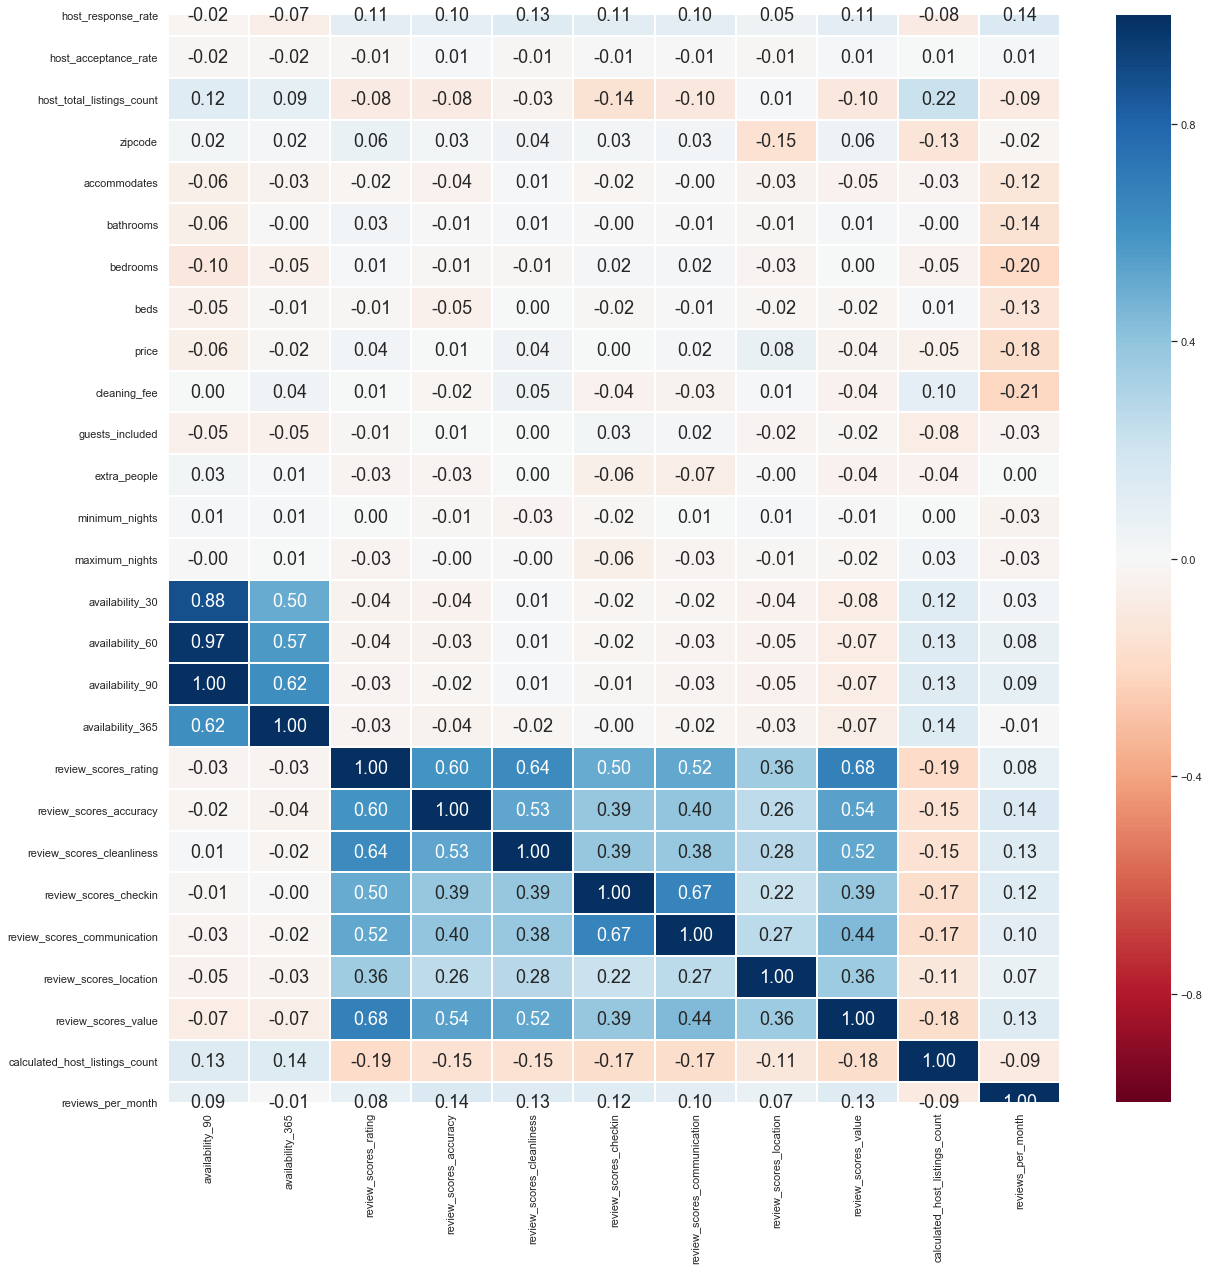

In [16]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(corr_df.loc[:,"availability_90":], vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Collate important correlations to better analyse

In [17]:
imptCols = ["price","accommodates","bathrooms","bedrooms","beds","guests_included"]
imptCorr_df = pd.DataFrame(corr_df.loc[imptCols,imptCols])
imptCorr_df

price  accommodates  bathrooms  bedrooms      beds  \
price            1.000000      0.652218   0.515867  0.627512  0.589701   
accommodates     0.652218      1.000000   0.537664  0.770501  0.861064   
bathrooms        0.515867      0.537664   1.000000  0.609891  0.531887   
bedrooms         0.627512      0.770501   0.609891  1.000000  0.752210   
beds             0.589701      0.861064   0.531887  0.752210  1.000000   
guests_included  0.392875      0.532796   0.304749  0.456565  0.460272   

                 guests_included  
price                   0.392875  
accommodates            0.532796  
bathrooms               0.304749  
bedrooms                0.456565  
beds                    0.460272  
guests_included         1.000000

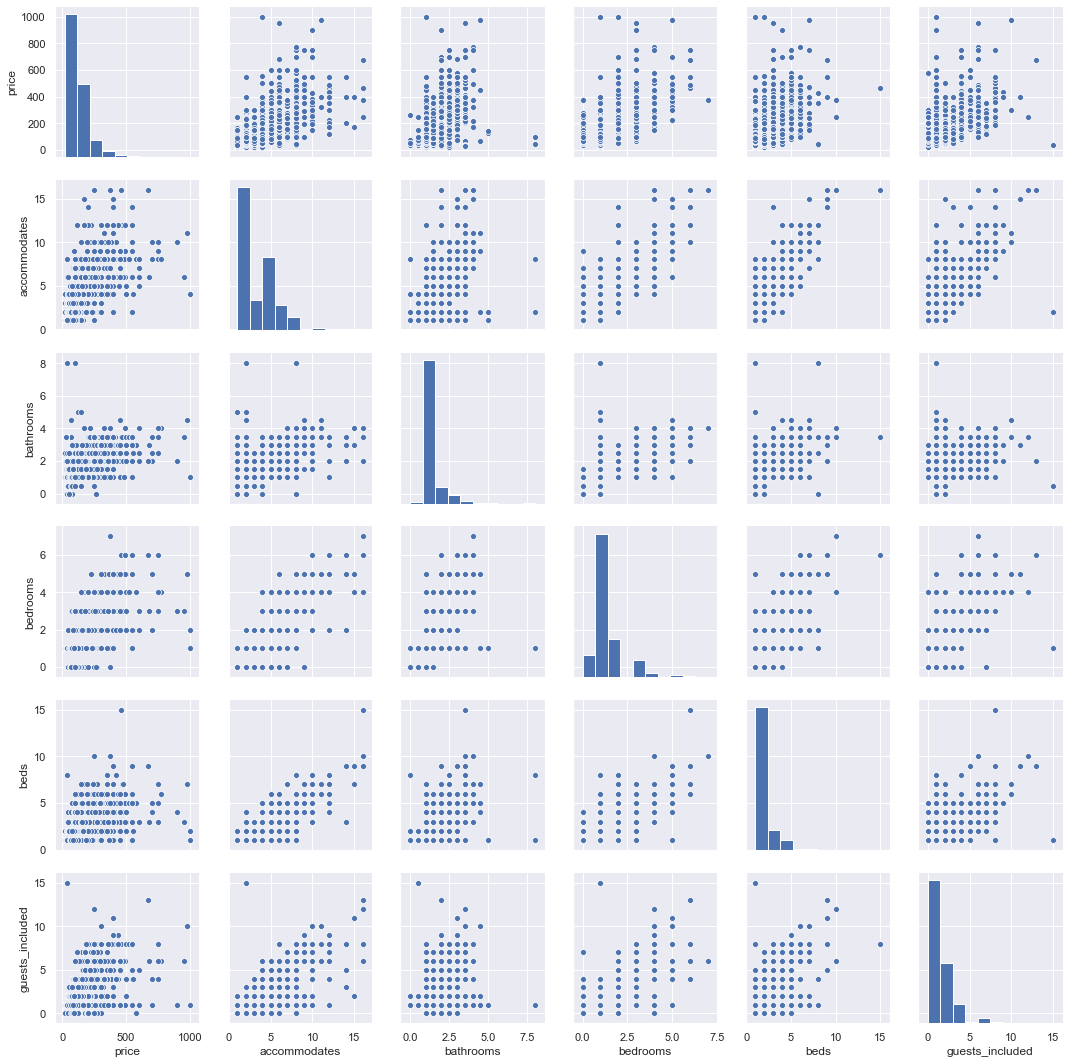

In [23]:
sb.pairplot(numerical_data[imptCols])

__Heatmap for correlation matrix__

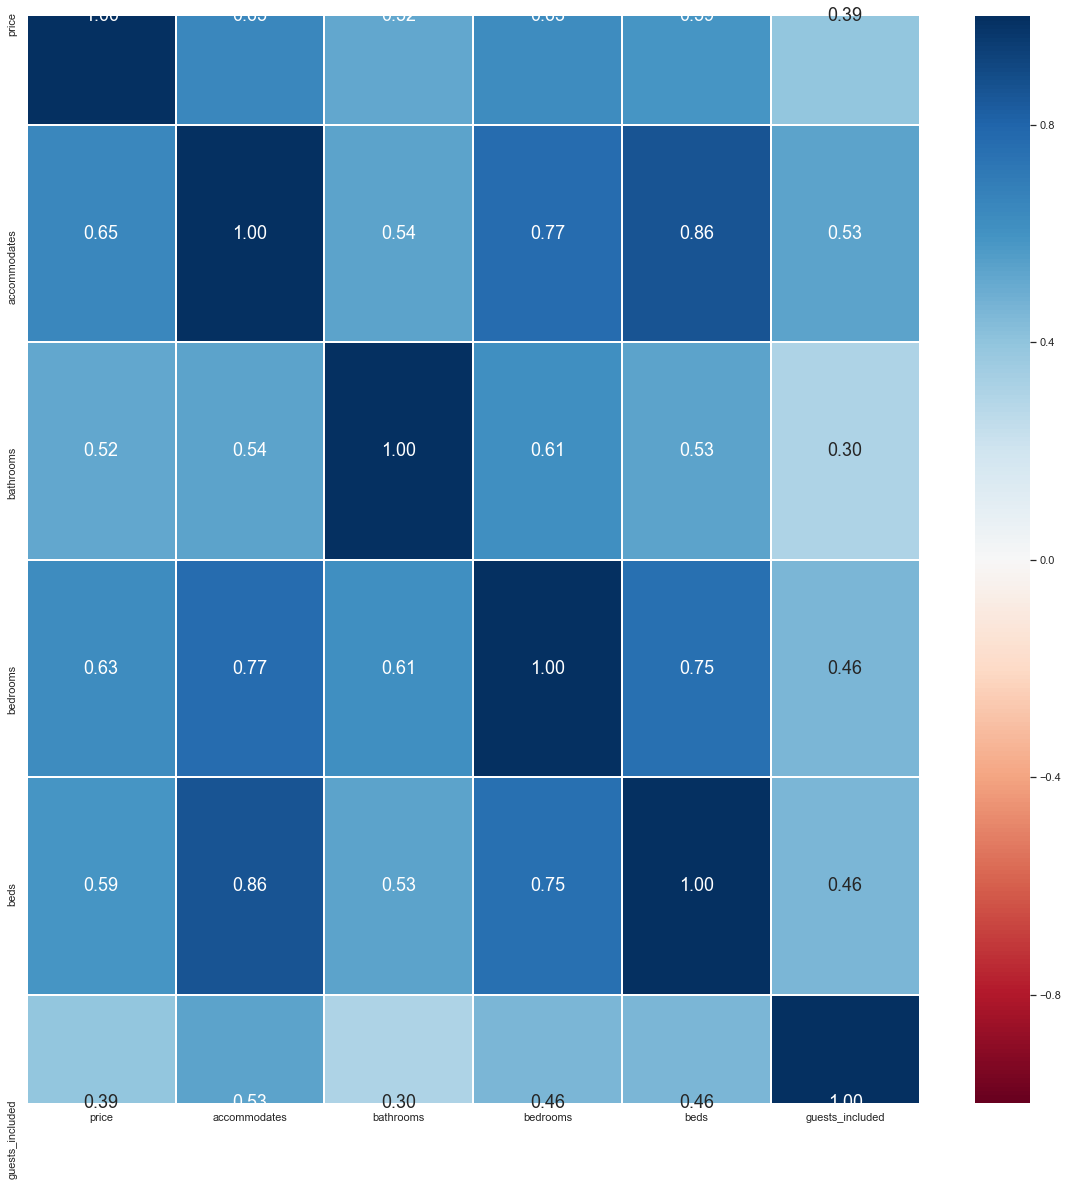

In [18]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(imptCorr_df, vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

__No. of accommodates, bathrooms, bedrooms, beds and guests included__

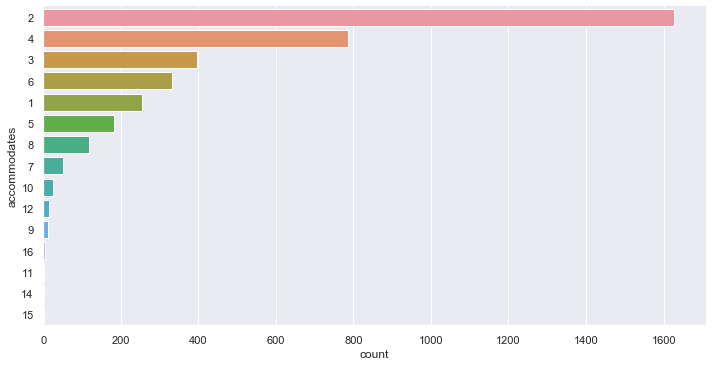

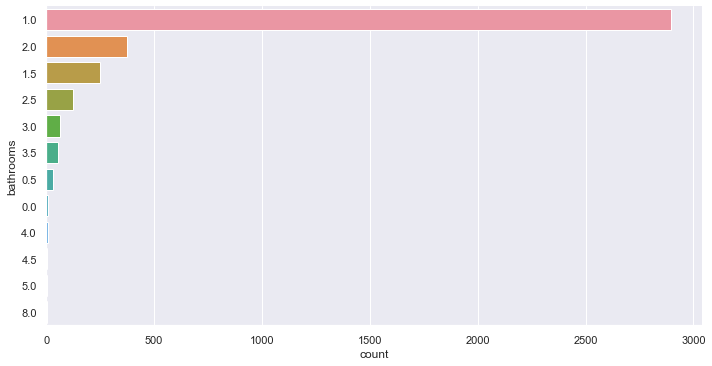

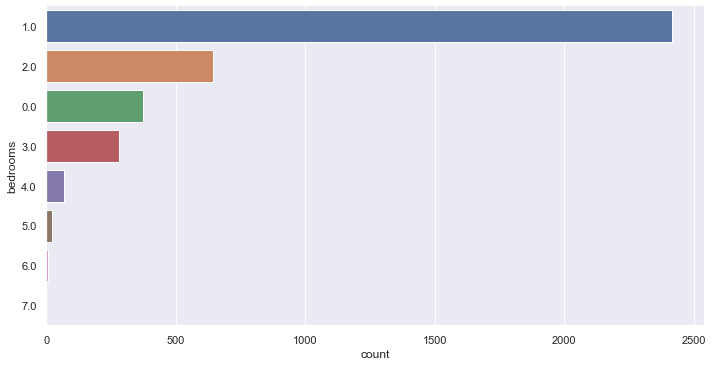

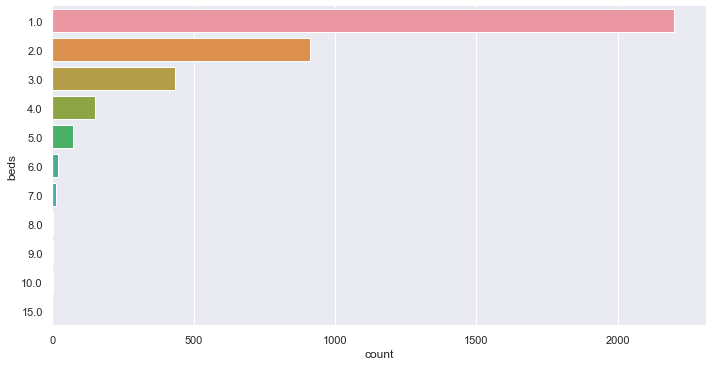

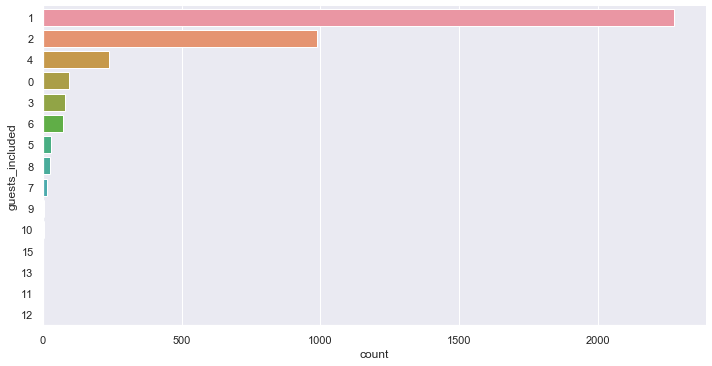

In [19]:
sb.catplot(y = "accommodates", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['accommodates'].value_counts().index)
sb.catplot(y = "bathrooms", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['bathrooms'].value_counts().index)
sb.catplot(y = "bedrooms", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['bedrooms'].value_counts().index)
sb.catplot(y = "beds", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['beds'].value_counts().index)
sb.catplot(y = "guests_included", data = numerical_data, kind = "count", aspect = 2, order = numerical_data['guests_included'].value_counts().index)

__Radar Chart__

In [21]:
fig = go.Figure(data=go.Scatterpolar(
  r=[1, 5, 2, 2, 3],
  theta=imptCols,
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()

# Categorical Variables

In [24]:
categorical_data = categorical_data.drop(columns=['name','summary','space','description','neighborhood_overview','transit','calendar_updated','first_review','last_review','street','has_availability','host_neighbourhood','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed'])

In [25]:
categorical_data.describe()

host_since host_response_time host_is_superhost  \
count        3818               3818              3818   
unique       1380                  4                 2   
top     30/8/2013     within an hour                 f   
freq           51               1961              3040   

                                      host_verifications  \
count                                               3818   
unique                                               116   
top     ['email', 'phone', 'facebook', 'reviews', 'kba']   
freq                                                 595   

       host_identity_verified is_location_exact property_type  \
count                    3818              3818          3818   
unique                      2                 2            16   
top                         t                 t         House   
freq                     2998              3412          1733   

              room_type  bed_type amenities instant_bookable  \
count              3818      3818      3818             3818   
unique                3         5      3284                2   
top     Entire home/apt  Real Bed        {}                f   
freq               2541      3657        45             3227   

       cancellation_policy require_guest_profile_picture  \
count                 3818                          3818   
unique                   3                             2   
top                 strict                             f   
freq                  1417                          3497   

       require_guest_phone_verification  
count                              3818  
unique                                2  
top                                   f  
freq                               3443

In [26]:
price = listings['price']
categorical_price = pd.concat([categorical_data, price], axis=1, sort=False)
categorical_price

host_since  host_response_time host_is_superhost  \
0      11/8/2011  within a few hours                 f   
1      21/2/2013      within an hour                 t   
2      12/6/2014  within a few hours                 f   
3      6/11/2013  within a few hours                 f   
4     29/11/2011      within an hour                 f   
...          ...                 ...               ...   
3813   13/4/2015  within a few hours                 f   
3814  14/10/2015      within an hour                 f   
3815  30/12/2015      within an hour                 f   
3816    3/1/2015      within an hour                 f   
3817   25/4/2014        within a day                 f   

                                     host_verifications  \
0                  ['email', 'phone', 'reviews', 'kba']   
1     ['email', 'phone', 'facebook', 'linkedin', 're...   
2      ['email', 'phone', 'google', 'reviews', 'jumio']   
3     ['email', 'phone', 'facebook', 'reviews', 'jum...   
4      ['email', 'phone', 'facebook', 'reviews', 'kba']   
...                                                 ...   
3813  ['email', 'phone', 'linkedin', 'reviews', 'jum...   
3814  ['email', 'phone', 'facebook', 'reviews', 'jum...   
3815                                          ['phone']   
3816   ['email', 'phone', 'facebook', 'reviews', 'kba']   
3817               ['email', 'phone', 'reviews', 'kba']   

     host_identity_verified is_location_exact property_type        room_type  \
0                         t                 t     Apartment  Entire home/apt   
1                         t                 t     Apartment  Entire home/apt   
2                         t                 t         House  Entire home/apt   
3                         t                 t     Apartment  Entire home/apt   
4                         t                 t         House  Entire home/apt   
...                     ...               ...           ...              ...   
3813                      t                 t         House  Entire home/apt   
3814                      t                 t     Apartment  Entire home/apt   
3815                      f                 f         House  Entire home/apt   
3816                      t                 f   Condominium  Entire home/apt   
3817                      t                 t     Apartment  Entire home/apt   

      bed_type                                          amenities  \
0     Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   
1     Real Bed  {TV,Internet,"Wireless Internet",Kitchen,"Free...   
2     Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3     Real Bed  {Internet,"Wireless Internet",Kitchen,"Indoor ...   
4     Real Bed  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
...        ...                                                ...   
3813  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3814  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
3815  Real Bed  {"Cable TV","Wireless Internet",Kitchen,"Free ...   
3816  Real Bed  {TV,"Wireless Internet",Kitchen,"Free Parking ...   
3817  Real Bed  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   

     instant_bookable cancellation_policy require_guest_profile_picture  \
0                   f            moderate                             f   
1                   f              strict                             t   
2                   f              strict                             f   
3                   f            flexible                             f   
4                   f              strict                             f   
...               ...                 ...                           ...   
3813                f              strict                             f   
3814                f            moderate                             f   
3815                f            moderate                             f   
3816                f            moderate                   

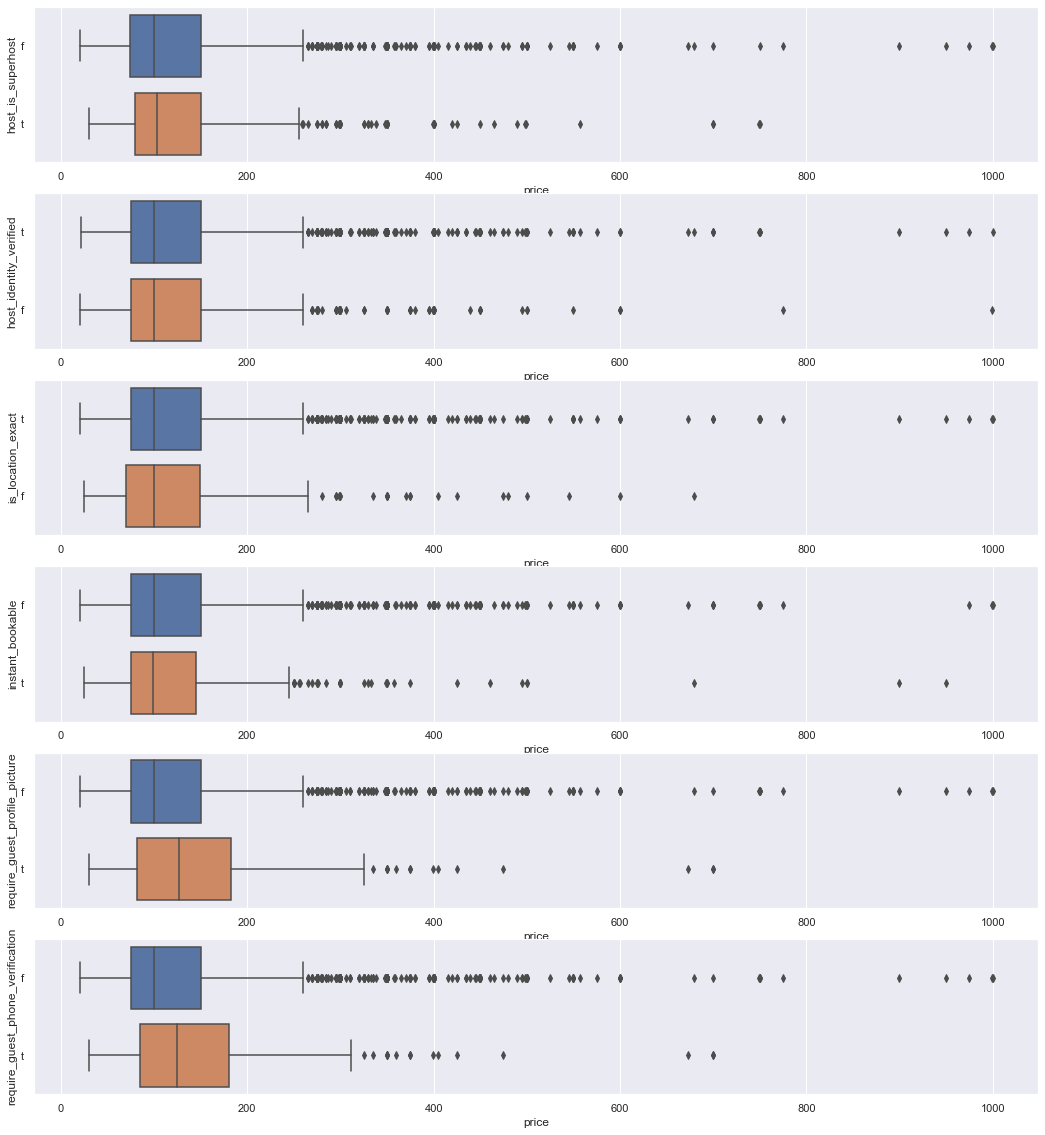

In [27]:
f, axes = plt.subplots(6, 1, figsize=(18, 20))
sb.boxplot(x="price", y="host_is_superhost", data=categorical_price,  orient = "h", ax = axes[0])
sb.boxplot(x="price", y="host_identity_verified", data=categorical_price, ax = axes[1])
sb.boxplot(x="price", y="is_location_exact", data=categorical_price, ax = axes[2])
sb.boxplot(x="price", y="instant_bookable", data=categorical_price, ax = axes[3])
sb.boxplot(x="price", y="require_guest_profile_picture", data=categorical_price, ax = axes[4])
sb.boxplot(x="price", y="require_guest_phone_verification", data=categorical_price, ax = axes[5])

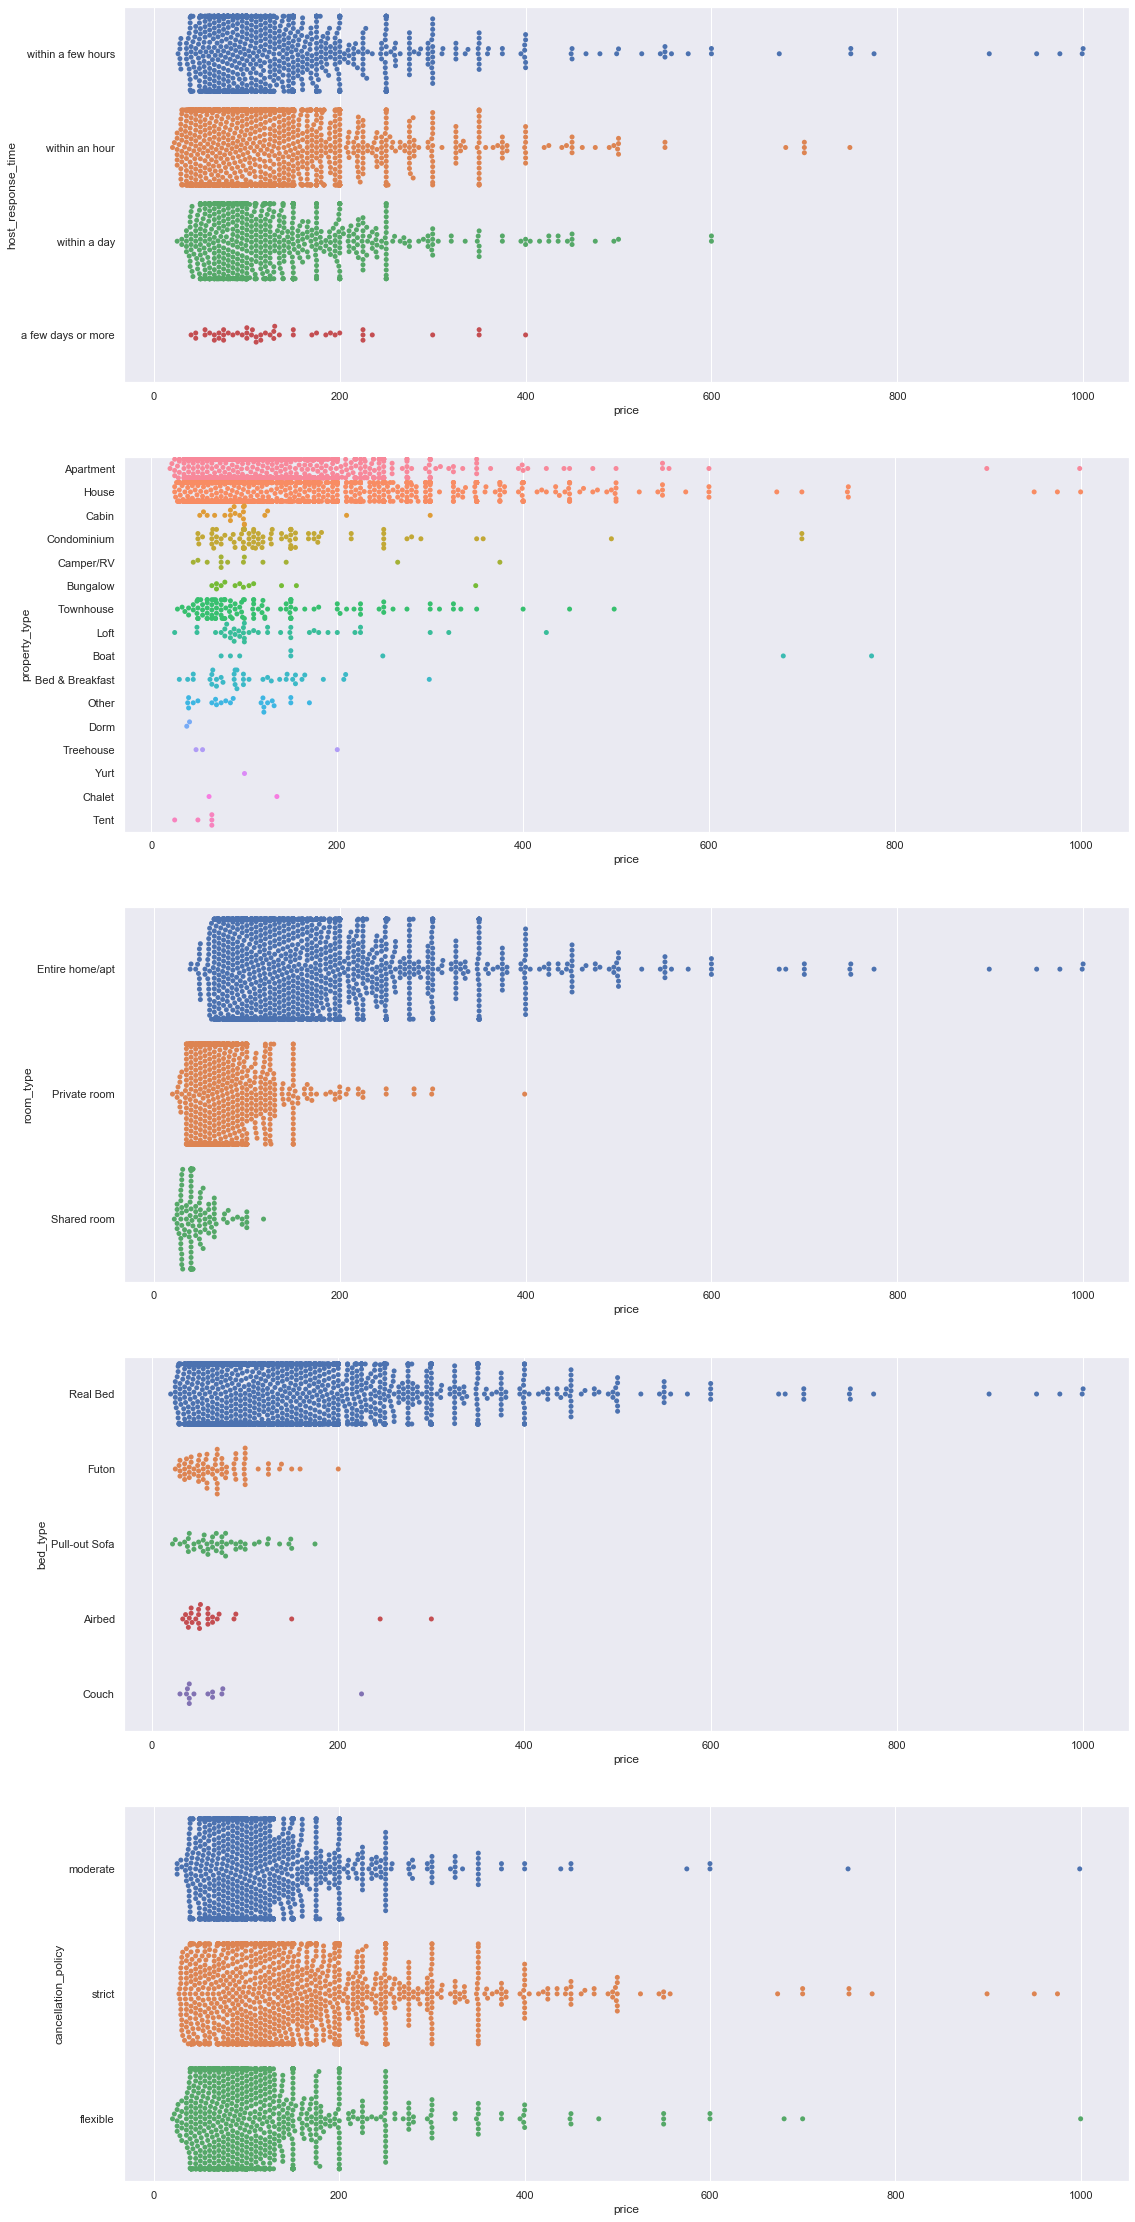

In [28]:
f, axes = plt.subplots(5, 1, figsize=(18, 40))
sb.swarmplot(x="price", y="host_response_time", data=categorical_price,  orient = "h", ax = axes[0])
sb.swarmplot(x="price", y="property_type", data=categorical_price,  orient = "h", ax = axes[1])
sb.swarmplot(x="price", y="room_type", data=categorical_price,  orient = "h", ax = axes[2])
sb.swarmplot(x="price", y="bed_type", data=categorical_price,  orient = "h", ax = axes[3])
sb.swarmplot(x="price", y="cancellation_policy", data=categorical_price,  orient = "h", ax = axes[4])

__Seeing what amenities are most common and which affects price the most__

In [29]:
amenities = pd.read_csv('..\dataset_filter\listings_3.csv')
amenities = amenities.loc[:,"24-Hour Check-in":]
amenities = pd.concat([amenities, price], axis=1, sort=False)
amenities

24-Hour Check-in  Access Friendly  Breakfast  Essentials  \
0                False            False      False       False   
1                False            False      False        True   
2                False            False      False        True   
3                False            False      False        True   
4                False            False      False        True   
...                ...              ...        ...         ...   
3813             False             True      False        True   
3814              True            False      False        True   
3815             False            False       True        True   
3816             False             True      False        True   
3817             False             True      False        True   

      Family/Kid Friendly  Free Parking on Premises    Gym  Hot Tub  Internet  \
0                    True                     False  False    False      True   
1                    True                      True  False    False      True   
2                    True                      True  False     True      True   
3                    True                     False  False    False      True   
4                    True                     False  False    False      True   
...                   ...                       ...    ...      ...       ...   
3813                 True                      True  False    False      True   
3814                 True                      True  False    False      True   
3815                False                      True  False    False      True   
3816                False                      True  False    False      True   
3817                 True                      True  False     True      True   

      Kitchen  Laundry Facility  Pet Friendly   Pool  Safety Features  \
0        True              True         False  False            False   
1        True              True         False  False             True   
2        True              True          True  False             True   
3        True              True         False  False             True   
4        True             False         False  False             True   
...       ...               ...           ...    ...              ...   
3813     True              True         False  False             True   
3814     True              True         False  False             True   
3815     True              True          True  False             True   
3816     True              True         False  False             True   
3817     True              True          True  False             True   

      Security Features  Smoking Allowed  Suitable for Events     TV  \
0                 False            False                False   True   
1                  True            False                False   True   
2                 False            False                False   True   
3                  True            False                False  False   
4                 False            False                False   True   
...                 ...              ...                  ...    ...   
3813              False            False                False   True   
3814              False            False                False   True   
3815               True            False                False   True   
3816              False            False                False   True   
3817               True            False                False   True   

      Weather Control  price  
0                True   85.0  
1                True  150.0  
2                True  975.0  
3                True  100.0  
4                True  450.0  
...               ...    ...  
3813             True  359.0  
3814             True   79.0  
3815             True   93.0  
3816             True   99.0  
3817             True   87.0  

[3818 rows x 20 columns]

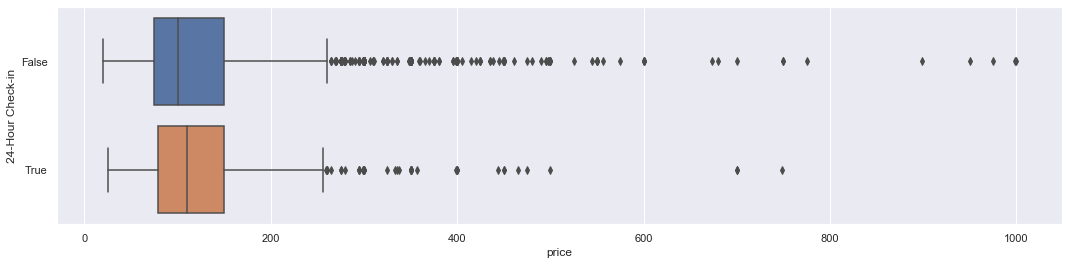

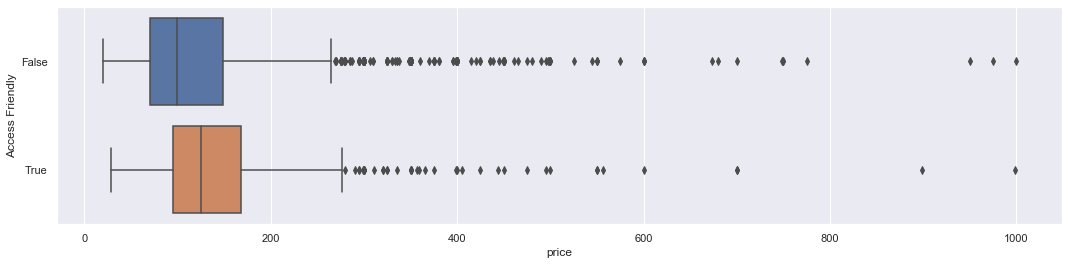

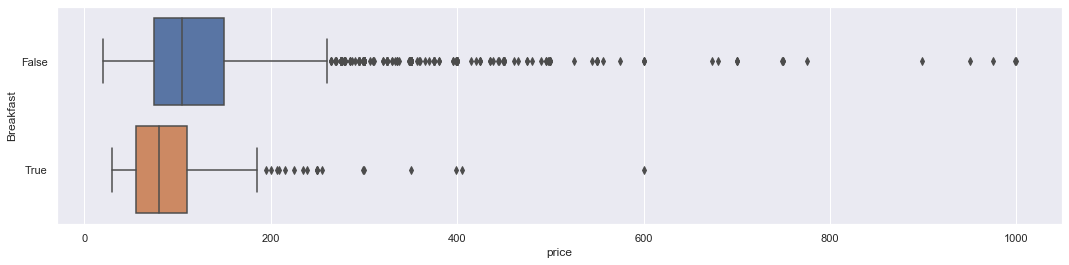

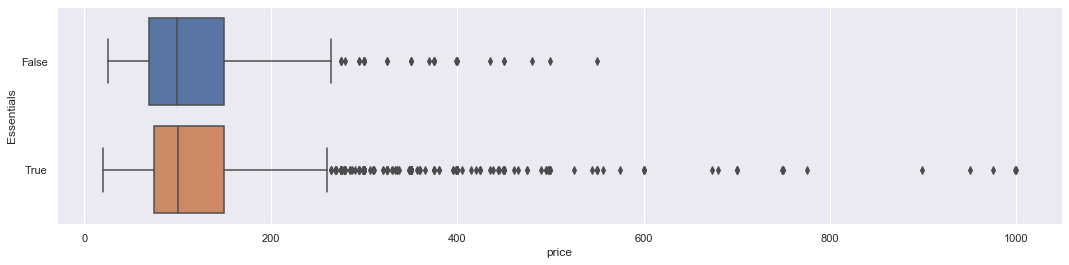

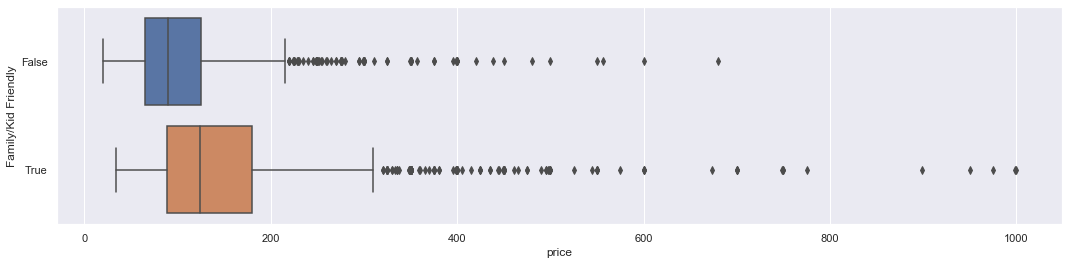

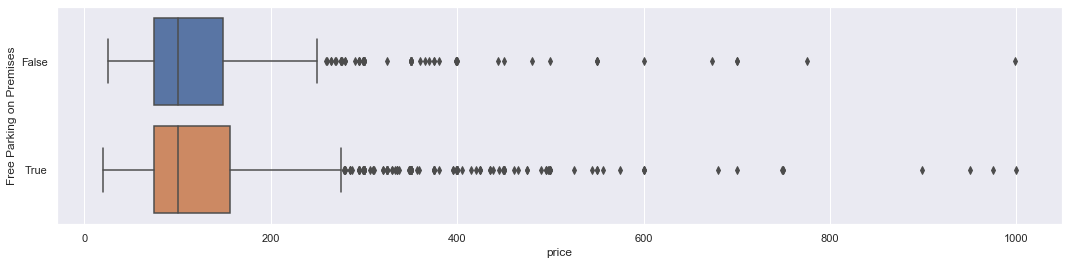

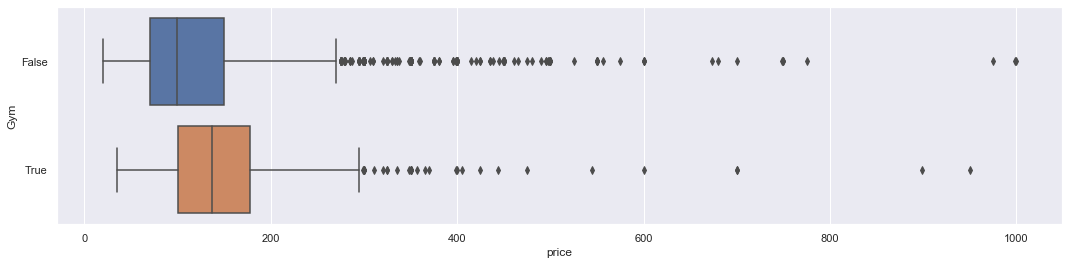

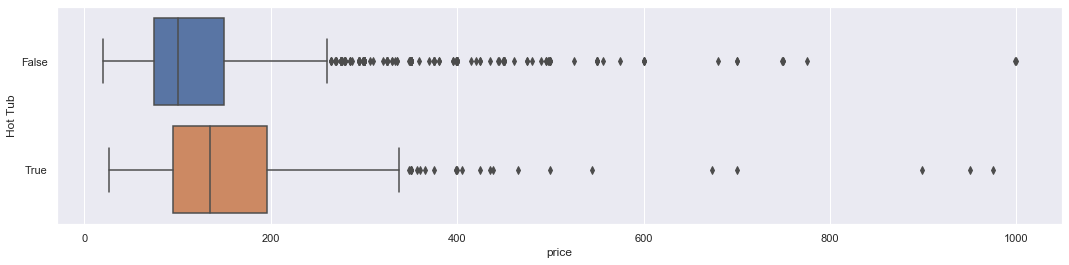

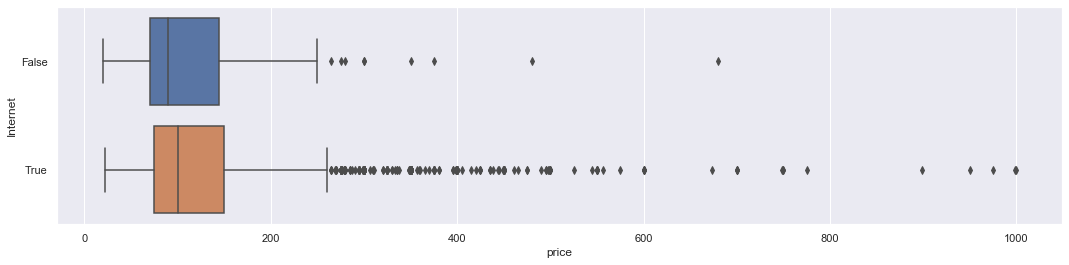

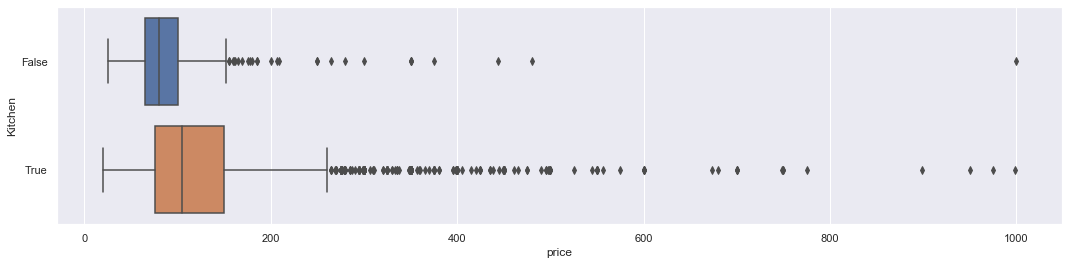

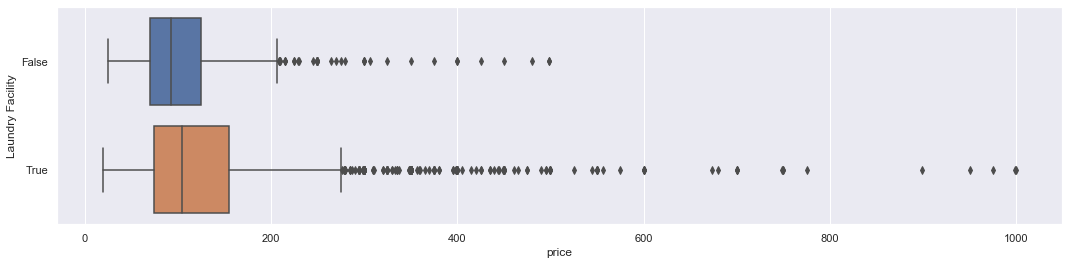

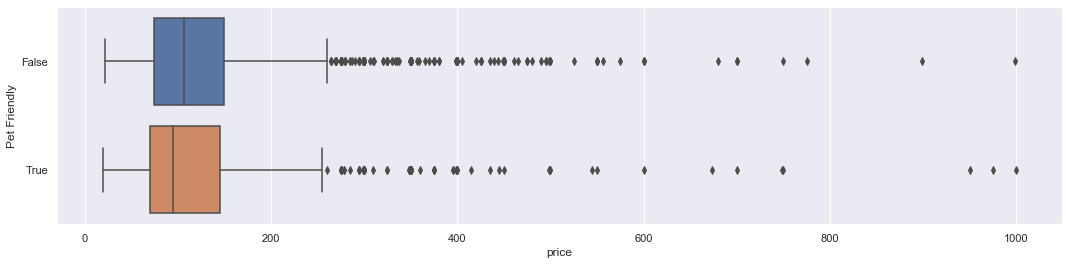

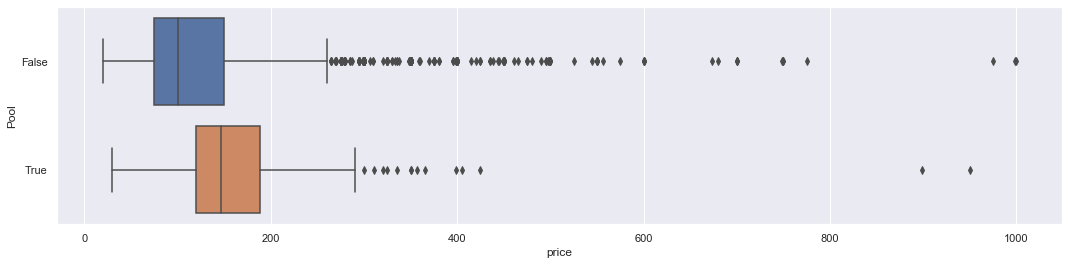

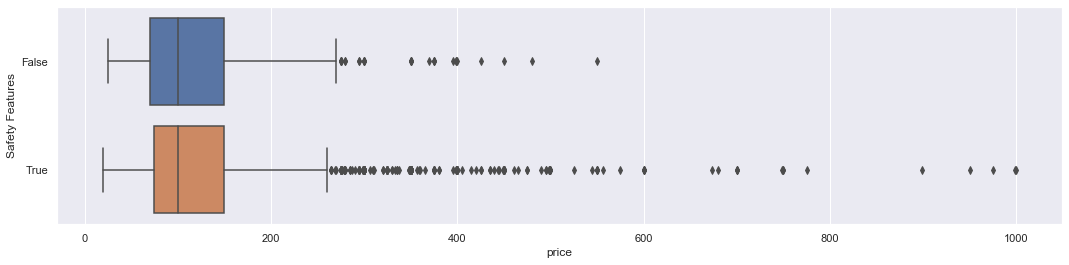

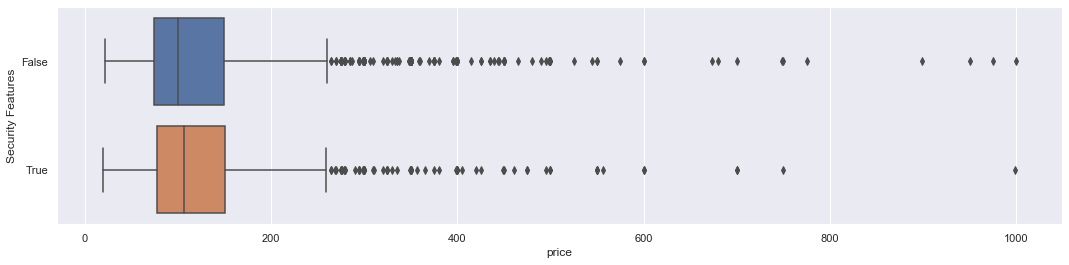

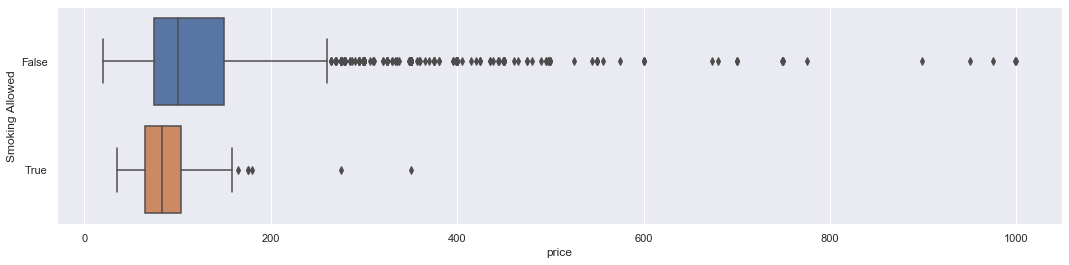

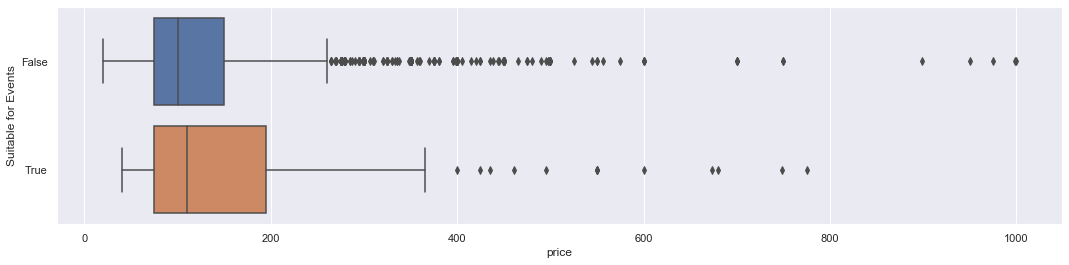

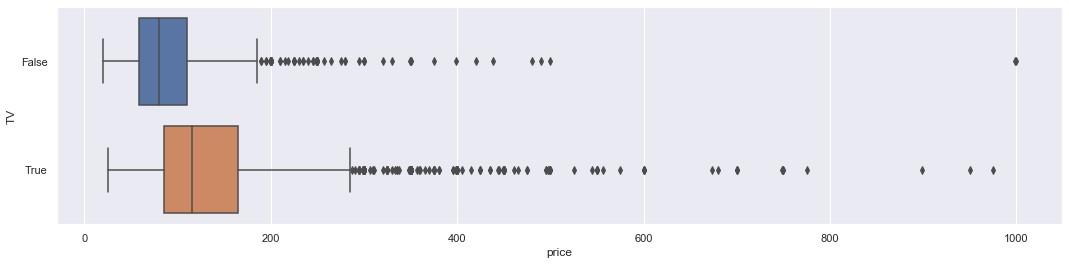

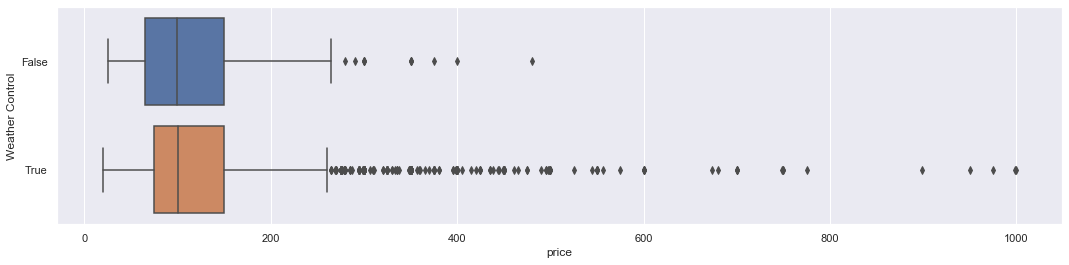

In [33]:
for var in amenities:
        if var != 'price':
            f, axes = plt.subplots(1, 1, figsize=(18, 4))
            sb.boxplot(x="price", y=var, data=amenities,  orient = "h")